## Lending Club Case study

- Name: Gautam Bhutani
- Email: bhutanigautam185@gmail.com
- Batch: C37
- Group Member Name : Pratik Pattanaik

## Business Requirements

A **consumer finance** company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is **likely to repay the loan**, then not approving the loan results in a loss of business to the company

- If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company

When a person applies for a loan, there are two types of decisions that could be taken by the company:

- Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    - Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

## Objective

**The company wants to understand the driving factors (or driver variables) behind loan default,
i.e. the variables which are strong indicators of default. <br><br>The major objective of EDA is to analyze the data and identify the useful patterns. This will provide the insights which will help the Company to minimise the risk of losing money while lending to customers.<br><br>
The information derived from these insights will ensure that any customers that are capable of repaying loan are not rejected and the customers which have history of not repaying loans on time or are defaulters can be suitably dealt with.<br><br>
The company can utilise this knowledge for its portfolio and risk assessment.** 

### Importing required Libraries

In [1]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

#Setting base figure size 
plt.rcParams["figure.figsize"] = (15,4)
plt.rcParams['figure.constrained_layout.use'] = True

### Load Dataset

In [3]:
#loading the dataset
loan_data = pd.read_csv('loan.csv', low_memory=False)

In [4]:
#loading the Data dictionary as well
data_dic = pd.read_excel('Data_Dictionary.xlsx')

In [5]:
#Looking at the view of data
loan_data.head(1)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   

   annual_inc verification_status issue_d loan_status pymnt_plan  \
0    24000.00            Verified  Dec-11  Fully Paid          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   

                                                                             desc  \
0    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   

       purpose     title zip_code addr_state   dti  delinq_2yrs  \
0  credit_card  Computer    860xx         AZ 27.65            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f       0.00           0.00      5863.16          5833.84   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                     0.00       Jan-15           171.62          NaN   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0             May-16                        0.00                          NaN   

   policy_code application_type  annual_inc_joint  dti_joint  \
0            1       INDIVIDUAL               NaN        NaN   

   verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                        NaN               0           NaN          NaN   

   open_acc_6m  open_il_6m  open_il_12m  open_il_24m  mths_since_rcnt_il  \
0          NaN         NaN          NaN          NaN                 NaN   

   total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  \
0           NaN      NaN          NaN          NaN         NaN       NaN   

   total_rev_hi_lim  inq_fi  total_cu_tl  inq_last_12m  acc_open_past_24mths  \
0               NaN     NaN          NaN           NaN                   NaN   

   avg_cur_bal  bc_open_to_buy  bc_util  chargeoff_within_12_mths  \
0          NaN             NaN      NaN                      0.00   

   delinq_amnt  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  \
0            0                 NaN                   NaN   

   mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  mths_since_recent_bc  \
0                    NaN             NaN       NaN                   NaN   

   mths_since_recent_bc_dlq  mths_since_recent_inq  \
0                       NaN                    NaN   

   mths_since_recent_revol_delinq  num_accts_ever_120_pd  num_actv_bc_tl  \
0                             NaN                    NaN             NaN   

   num_actv_rev_tl  num_bc_sats  num_bc_tl  num_il_tl  num_op_rev_tl  \
0              NaN          NaN        NaN        NaN            NaN   

   num_rev_accts  num_rev_tl_bal_gt_0  num_sats  num_tl_120dpd_2m  \
0            NaN                  NaN       NaN               NaN   

   num_tl_30dpd  num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq  \
0           NaN                 NaN                 NaN             NaN   

   percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  \
0               NaN                  0.00       0.00              NaN   

   total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  
0                NaN             NaN                         NaN

# Data Understanding

In [6]:
#Length of the dataset
len(loan_data)

39717

In [7]:
#using shape command to check the number of rows and columns of the dataset
print(loan_data.shape)

(39717, 111)


In [8]:
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [9]:
print(f"Loan Dataset has {loan_data.shape[0]} rows and {loan_data.shape[1]} columns.")

Loan Dataset has 39717 rows and 111 columns.


In [10]:
#using describe() function to get a detailed description of the dataset
loan_data.describe()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count   39717.00   39717.00   39717.00     39717.00         39717.00   
mean   683131.91  850463.56   11219.44     10947.71         10397.45   
std    210694.13  265678.31    7456.67      7187.24          7128.45   
min     54734.00   70699.00     500.00       500.00             0.00   
25%    516221.00  666780.00    5500.00      5400.00          5000.00   
50%    665665.00  850812.00   10000.00      9600.00          8975.00   
75%    837755.00 1047339.00   15000.00     15000.00         14400.00   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00   

       installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  \
count     39717.00    39717.00 39717.00     39717.00        39717.00   
mean        324.56    68968.93    13.32         0.15            0.87   
std         208.87    63793.77     6.68         0.49            1.07   
min          15.69     4000.00     0.00         0.00            0.00   
25%         167.02    40404.00     8.17         0.00            0.00   
50%         280.22    59000.00    13.40         0.00            1.00   
75%         430.78    82300.00    18.60         0.00            1.00   
max        1305.19  6000000.00    29.99        11.00            8.00   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
count                14035.00                 2786.00  39717.00 39717.00   
mean                    35.90                   69.70      9.29     0.06   
std                     22.02                   43.82      4.40     0.24   
min                      0.00                    0.00      2.00     0.00   
25%                     18.00                   22.00      6.00     0.00   
50%                     34.00                   90.00      9.00     0.00   
75%                     52.00                  104.00     12.00     0.00   
max                    120.00                  129.00     44.00     4.00   

       revol_bal  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
count   39717.00   39717.00   39717.00       39717.00     39717.00   
mean    13382.53      22.09      51.23          50.99     12153.60   
std     15885.02      11.40     375.17         373.82      9042.04   
min         0.00       2.00       0.00           0.00         0.00   
25%      3703.00      13.00       0.00           0.00      5576.93   
50%      8850.00      20.00       0.00           0.00      9899.64   
75%     17058.00      29.00       0.00           0.00     16534.43   
max    149588.00      90.00    6311.47        6307.37     58563.68   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count         39717.00         39717.00       39717.00            39717.00   
mean          11567.15          9793.35        2263.66                1.36   
std            8942.67          7065.52        2608.11                7.29   
min               0.00             0.00           0.00                0.00   
25%            5112.31          4600.00         662.18                0.00   
50%            9287.15          8000.00        1348.91                0.00   
75%           15798.81         13653.26        2833.40                0.00   
max           58563.68         35000.02       23563.68              180.20   

       recoveries  collection_recovery_fee  last_pymnt_amnt  \
count    39717.00                 39717.00         39717.00   
mean        95.22                    12.41          2678.83   
std        688.74                   148.67          4447.14   
min          0.00                     0.00             0.00   
25%          0.00                     0.00           218.68   
50%          0.00                     0.00           546.14   
75%          0.00                     0.00          3293.16   
max      29623.35                  7002.19         36115.20   

       collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
count                    39661.00                 

### Checking for missing values in the data

In [11]:
#Finding percentage of null or missing values
loan_data_null_perc = round(100*(loan_data.isnull().sum()/len(loan_data.index)).sort_values(ascending=False), 2)
#Printing columns which have more than 0% missing values
loan_data_null_perc[ loan_data_null_perc > 0 ]

verification_status_joint        100.00
annual_inc_joint                 100.00
mo_sin_old_rev_tl_op             100.00
mo_sin_old_il_acct               100.00
bc_util                          100.00
bc_open_to_buy                   100.00
avg_cur_bal                      100.00
acc_open_past_24mths             100.00
inq_last_12m                     100.00
total_cu_tl                      100.00
inq_fi                           100.00
total_rev_hi_lim                 100.00
all_util                         100.00
max_bal_bc                       100.00
open_rv_24m                      100.00
open_rv_12m                      100.00
il_util                          100.00
total_bal_il                     100.00
mths_since_rcnt_il               100.00
open_il_24m                      100.00
open_il_12m                      100.00
open_il_6m                       100.00
open_acc_6m                      100.00
tot_cur_bal                      100.00
tot_coll_amt                     100.00


**On reviewing the dataframe and looking at the data dictionary for each column represents in the dataset, below columns have maximum null values and hence can be left out of analysis.**

- verification_status_joint         <br>
- annual_inc_joint                  <br>
- mo_sin_old_rev_tl_op              <br>
- mo_sin_old_il_acct                <br>
- bc_util                           <br>
- bc_open_to_buy                    <br>
- avg_cur_bal                       <br>
- acc_open_past_24mths              <br>
- inq_last_12m                      <br>
- total_cu_tl                       <br>
- inq_fi                            <br>
- total_rev_hi_lim                  <br>
- all_util                          <br>
- max_bal_bc                        <br>
- open_rv_24m                       <br>
- open_rv_12m                       <br>
- il_util                           <br>
- total_bal_il                      <br>
- mths_since_rcnt_il                <br>
- open_il_24m                       <br>
- open_il_12m                       <br>
- open_il_6m                        <br>
- open_acc_6m                       <br>
- tot_cur_bal                       <br>
- tot_coll_amt                      <br>
- mo_sin_rcnt_rev_tl_op             <br>
- mo_sin_rcnt_tl                    <br>
- mort_acc                          <br>
- num_rev_tl_bal_gt_0               <br>
- total_bc_limit                    <br>
- total_bal_ex_mort                 <br>
- tot_hi_cred_lim                   <br>
- percent_bc_gt_75                  <br>
- pct_tl_nvr_dlq                    <br>
- num_tl_op_past_12m                <br>
- num_tl_90g_dpd_24m                <br>
- num_tl_30dpd                      <br>
- num_tl_120dpd_2m                  <br>
- num_sats                          <br>
- num_rev_accts                     <br>
- mths_since_recent_bc              <br>
- num_op_rev_tl                     <br>
- num_il_tl                         <br>
- num_bc_tl                         <br>
- num_bc_sats                       <br>
- num_actv_rev_tl                   <br>
- num_actv_bc_tl                    <br>
- num_accts_ever_120_pd             <br>
- mths_since_recent_revol_delinq    <br>
- mths_since_recent_inq             <br>
- mths_since_recent_bc_dlq          <br>
- dti_joint                         <br>
- total_il_high_credit_limit        <br>
- mths_since_last_major_derog       <br>
- next_pymnt_d                      <br>
- mths_since_last_record            <br>
- mths_since_last_delinq            <br>

In [12]:
#Removing columns which has more than 50% null values in it.
loan_data.drop(loan_data_null_perc[ loan_data_null_perc > 50 ].index, axis=1, inplace=True)

Variables - **desc**(32.48 %) **emp_title**(6.19 %) cab also be removed as they are descriptive variables.

In [13]:
#Finding minimum number of unique values for each column
loan_data.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
initial_list_status           1
collections_12_mths_ex_med    1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

### The variables which have a one unique value can be removed as we might not gather useful insights .
#### Explaination for variables 
- **tax_liens** <br>
  - Number of tax liens is not available for all. 
- **delinq_amnt** <br>
  - No past-due amount owed for the accounts on which the customer is now delinquent.
- **chargeoff_within_12_mths** <br>
  - No one charged off within 12 months
- **acc_now_delinq** <br>  
  - The number of accounts on which the customer is now delinquent is 0.
- **application_type** <br>
  - All the application type were at INDIVIDUAL Level.
- **policy_code** <br>
  - publicly available policy_code is 1 for all. 
- **collections_12_mths_ex_med** <br>
  - Number of collections in 12 months excluding medical collections is not available .
- **initial_list_status** <br>
  - The initial listing status of the loan for all is F.
- **pymnt_plan** <br>
  - Payment plan has been put in place for the loan is n(NO).

In [14]:
#Dropping Columns with only one unique value.
loan_data.drop(['emp_title','desc','tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [15]:
#Finding maximum number of unique values for each column
loan_data.nunique().sort_values().tail(15)

dti                 2868
recoveries          4040
annual_inc          5318
total_rec_prncp     7976
funded_amnt_inv     8205
installment        15383
title              19615
revol_bal          21711
last_pymnt_amnt    34930
total_rec_int      35148
total_pymnt_inv    37518
total_pymnt        37850
url                39717
member_id          39717
id                 39717
dtype: int64

In [16]:
## Reviewing the columns with all unique values
loan_data[['id','url','member_id']].head(5)

id                                                               url  \
0  1077501  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  1077430  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  1077175  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  1076863  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  1075358  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   

   member_id  
0    1296599  
1    1314167  
2    1313524  
3    1277178  
4    1311748

#### We can now remove the url column and the member_id column as it doesnt seem useful

In [17]:
loan_data.drop(['member_id', 'url'], axis=1, inplace=True)

#### Checking correlated Variables

In [18]:
#checking the correlation for loan amount , funded amount and funded amount by investor 
loan_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv','installment',]].corr()

loan_amnt  funded_amnt  funded_amnt_inv  installment
loan_amnt             1.00         0.98             0.94         0.93
funded_amnt           0.98         1.00             0.96         0.96
funded_amnt_inv       0.94         0.96             1.00         0.91
installment           0.93         0.96             0.91         1.00

In [19]:
#checking the correlation for total payment  , total payment investory  
loan_data[['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int',]].corr()

total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int
total_pymnt             1.00             0.97             0.97           0.83
total_pymnt_inv         0.97             1.00             0.94           0.82
total_rec_prncp         0.97             0.94             1.00           0.68
total_rec_int           0.83             0.82             0.68           1.00

These variables are highly correlated features which can be removed. <br>
These can be removed before training the model . <br> We can look at the installment variables to see how it behaves in case of Default customers.

In [20]:
#Checking missing values for the remaining columns
loan_data_null_perc = round(100*(loan_data.isnull().sum()/len(loan_data.index)).sort_values(ascending=False), 2)
loan_data_null_perc[ loan_data_null_perc > 0 ]

emp_length             2.71
pub_rec_bankruptcies   1.75
last_pymnt_d           0.18
revol_util             0.13
title                  0.03
last_credit_pull_d     0.01
dtype: float64

**We can either fill the missing values for these variables by a measure of central tendency (Mean,Mode or Median) or we can remove these values as well as these are very small missing values and won't impact our analysis**


As we have learnt the concepts of **MNAR(Missing Not at Random)**, **MCAR (Missing Completely at Random)** and **MNAR(Missing at Random)**, we can use that here to ignore some missing values as well.

In [21]:
#Filling missing values by mode
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].fillna(loan_data['pub_rec_bankruptcies'].mode())

In [22]:
#Filling missing values by mode
loan_data['revol_util'] = loan_data['revol_util'].fillna(loan_data['revol_util'].mode())

For **emp_length** we will fill the missing values after standardizing the data.

Removing the title , last_pymnt_d and last_credit_pull_d null values which are missing

In [23]:
loan_data.dropna(subset=['title','last_pymnt_d','last_credit_pull_d'],inplace=True)

#### Removing the variables from data dictionary before analysing other variables

In [24]:
#Removing columns to check description before analysing
data_dic = data_dic[data_dic['LoanStatNew'].isin(loan_data.columns)].reset_index(drop=True)

In [25]:
#Viewing the Data Dictionary
data_dic

LoanStatNew  \
0                addr_state   
1                annual_inc   
2   collection_recovery_fee   
3               delinq_2yrs   
4                       dti   
5          earliest_cr_line   
6                emp_length   
7               funded_amnt   
8           funded_amnt_inv   
9                     grade   
10           home_ownership   
11                       id   
12           inq_last_6mths   
13              installment   
14                 int_rate   
15                  issue_d   
16       last_credit_pull_d   
17          last_pymnt_amnt   
18             last_pymnt_d   
19                loan_amnt   
20              loan_status   
21                 open_acc   
22                out_prncp   
23            out_prncp_inv   
24                  pub_rec   
25     pub_rec_bankruptcies   
26                  purpose   
27               recoveries   
28                revol_bal   
29               revol_util   
30                sub_grade   
31                     term   
32                    title   
33                total_acc   
34              total_pymnt   
35          total_pymnt_inv   
36            total_rec_int   
37       total_rec_late_fee   
38          total_rec_prncp   
39      verification_status   
40                 zip_code   

                                                                                                                                                                                                 Description  
0                                                                                                                                                 The state provided by the borrower in the loan application  
1                                                                                                                              The self-reported annual income provided by the borrower during registration.  
2                                                                                                                                                                             post charge off collection fee  
3                                                                                               The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years  
4   A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.  
5                                                                                                                                          The month the borrower's earliest reported credit line was opened  
6                                                                         Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.   
7                                                                                                                                             The total amount committed to that loan at that point in time.  
8                                                                                                                               The total amount committed by investors for that loan at that point in time.  
9                                                                                                                                                                                     LC assigned loan grade  
10                                                                                       The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.  
11                                                                                                                                                             A unique LC assigned ID for the loan listing.  
12                    

## Data Standardization

In [26]:
## Analyzing the columns 
loan_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [27]:
# Looking at the dtype and count of each variable
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39633 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39633 non-null  int64  
 1   loan_amnt                39633 non-null  int64  
 2   funded_amnt              39633 non-null  int64  
 3   funded_amnt_inv          39633 non-null  float64
 4   term                     39633 non-null  object 
 5   int_rate                 39633 non-null  object 
 6   installment              39633 non-null  float64
 7   grade                    39633 non-null  object 
 8   sub_grade                39633 non-null  object 
 9   emp_length               38564 non-null  object 
 10  home_ownership           39633 non-null  object 
 11  annual_inc               39633 non-null  float64
 12  verification_status      39633 non-null  object 
 13  issue_d                  39633 non-null  object 
 14  loan_status           

In [28]:
loan_data.head(1)

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000          4975.00   36 months   10.65%   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT    24000.00   

  verification_status issue_d loan_status      purpose     title zip_code  \
0            Verified  Dec-11  Fully Paid  credit_card  Computer    860xx   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ 27.65            0           Jan-85               1         3   

   pub_rec  revol_bal revol_util  total_acc  out_prncp  out_prncp_inv  \
0        0      13648     83.70%          9       0.00           0.00   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0      5863.16          5833.84          5000.00         863.16   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   

   last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0           171.62             May-16                  0.00

The columns **issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d** have date format and hence can be standadized for better analysis.

In [29]:
#Creating derived year and month columns as well for issue date.

loan_data['issue_d']= pd.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data['issue_d'] = loan_data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2022 else x)

#loan_data.loc[loan_data['issue_d'] > 2011 , 'issue_d'] = loan_data['issue_d'] - 100

loan_data['issue_d_year'] = loan_data['issue_d'].dt.year
loan_data['issue_d_month'] = loan_data['issue_d'].dt.month

In [30]:
#Creating derived year and month columns as well for earliest credit 

loan_data['earliest_cr_line']= pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2022 else x)


loan_data['earliest_cr_line_year'] = loan_data['earliest_cr_line'].dt.year
loan_data['earliest_cr_line_month'] = loan_data['earliest_cr_line'].dt.month

In [31]:
#Changing last payment date format
loan_data['last_pymnt_d']= pd.to_datetime(loan_data['last_pymnt_d'], format='%b-%y')

In [32]:
#Changing last credit pull date
loan_data['last_credit_pull_d']= pd.to_datetime(loan_data['last_credit_pull_d'], format='%b-%y')

In [33]:
loan_data['last_credit_pull_d'].max()

Timestamp('2016-05-01 00:00:00')

The variables **term , int_rate, emp_length , revol_util** can be cleaned by removing the special characters

In [34]:
#Removing the % and converting it to float 

loan_data['int_rate'] = loan_data['int_rate'].str.strip('%').astype(float)
loan_data['revol_util'] = loan_data['revol_util'].str.strip('%').astype(float)

In [35]:
#Removing months/month from term 
loan_data['term'] = loan_data['term'].str.strip('months ').astype(int)

In [36]:
# Removing year/years from employement lenght
loan_data['emp_length'] = loan_data['emp_length'].str.replace(r'\D+', '', regex=True)

In [37]:
##Filling missing values for emp length
loan_data['emp_length'] = loan_data['emp_length'].fillna(loan_data['emp_length'].median())

In [38]:
loan_data.describe()

id  loan_amnt  funded_amnt  funded_amnt_inv     term  int_rate  \
count   39633.00   39633.00     39633.00         39633.00 39633.00  39633.00   
mean   683202.60   11225.52     10953.43         10404.68    42.42     12.02   
std    210719.94    7455.34      7185.76          7128.61    10.62      3.72   
min     54734.00     500.00       500.00             0.00    36.00      5.42   
25%    516247.00    5500.00      5400.00          5000.00    36.00      9.25   
50%    665748.00   10000.00      9600.00          8975.00    36.00     11.83   
75%    837814.00   15000.00     15000.00         14400.00    60.00     14.59   
max   1077501.00   35000.00     35000.00         35000.00    60.00     24.59   

       installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  \
count     39633.00    39633.00 39633.00     39633.00        39633.00   
mean        324.72    69012.47    13.32         0.15            0.87   
std         208.83    63842.16     6.68         0.49            1.07   
min          15.69     4000.00     0.00         0.00            0.00   
25%         167.08    40500.00     8.19         0.00            0.00   
50%         280.61    59000.00    13.41         0.00            1.00   
75%         430.78    82404.00    18.60         0.00            1.00   
max        1305.19  6000000.00    29.99        11.00            8.00   

       open_acc  pub_rec  revol_bal  revol_util  total_acc  out_prncp  \
count  39633.00 39633.00   39633.00    39587.00   39633.00   39633.00   
mean       9.30     0.06   13397.31       48.83      22.10      51.34   
std        4.40     0.24   15894.46       28.33      11.40     375.56   
min        2.00     0.00       0.00        0.00       2.00       0.00   
25%        6.00     0.00    3711.00       25.40      14.00       0.00   
50%        9.00     0.00    8862.00       49.30      20.00       0.00   
75%       12.00     0.00   17076.00       72.40      29.00       0.00   
max       44.00     4.00  149588.00       99.90      90.00    6311.47   

       out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
count       39633.00     39633.00         39633.00         39633.00   
mean           51.10     12175.62         11588.25          9812.13   
std           374.21      9036.71          8938.24          7059.81   
min             0.00        33.73             0.00             0.00   
25%             0.00      5594.01          5138.68          4648.89   
50%             0.00      9930.51          9308.16          8000.00   
75%             0.00     16553.74         15815.91         13703.96   
max          6307.37     58563.68         58563.68         35000.02   

       total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
count       39633.00            39633.00    39633.00                 39633.00   
mean         2267.82                1.37       94.30                    12.30   
std          2608.66                7.30      685.62                   148.35   
min             6.22                0.00        0.00                     0.00   
25%           665.16                0.00        0.00                     0.00   
50%          1353.29                0.00        0.00                     0.00   
75%          2838.13                0.00        0.00                     0.00   
max         23563.68              180.20    29623.35                  7002.19   

       last_pymnt_amnt  pub_rec_bankruptcies  issue_d_year  issue_d_month  \
count         39633.00              38937.00      39633.00       39633.00   
mean           2684.30                  0.04       2010.33           7.17   
std            4450.18                  0.20          0.88           3.40   
min               0.00                  0.00       2007.00           1.00   
25%             219.86                  0.00       2010.00           4.00   
50%             548.66                  0.00       2011.00           7.00   
75%            3307.04                  0.00       2011.00          10.00   


### Binning few continous variables for analyzing 

In [39]:
#Checking the distribution of loan amount
loan_data['loan_amnt'].describe()

count   39633.00
mean    11225.52
std      7455.34
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

In [40]:
#Creating derived variable after binning loan amount
loan_data['loan_amnt_bin'] = pd.cut(loan_data['loan_amnt'], 
                                      [x for x in range(0, 36000, 6000)], labels=[str(x)+'-'+str(x+6)+'k' for x in range (0, 30, 6)])

In [41]:
loan_data['loan_amnt_bin'].value_counts()

6-12k     13667
0-6k      12388
12-18k     6846
18-24k     3549
24-30k     2356
Name: loan_amnt_bin, dtype: int64

In [42]:
#converting last payment amount into int type from float
loan_data['last_pymnt_amnt']=loan_data['last_pymnt_amnt'].astype('int64')

As the part of the analysis , we are only interested in **Fully paid** and **Charged off** Customers , we can remove the customers whose status is **Current**. 

In [43]:
#Removing current loan status rows
loan_data = loan_data[loan_data['loan_status'] != 'Current']

In [44]:
loan_data.columns 

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_d_year', 'issue_d_month',
       'earliest_cr_line_year', 'earliest_cr_line_month', 'loan_amnt_bin'],
      dtype='object')

## Univariate Analysis

### Creating few custom functions for plotting

In [45]:
#Function to plot bar plots 

def uni_bar_plot(var):
    plt.figure(figsize=(12,5))
    prob_df = loan_data[var].value_counts(normalize=True).reset_index()
    prob_df[var] = round(prob_df[var]*100,2)
    axx = sns.barplot(x='index', y=var, data=prob_df)
    for container in axx.containers:
        axx.bar_label(container)
    plt.xlabel(var)
    plt.ylabel('Proportion')
    plt.title(var.capitalize()+' Distribution', fontdict = {'fontsize' : 20})
    plt.show()

In [46]:
#Function to plot Distribution plot along with box plot to check the anomalies

def Dist_box_plot(var):
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.title(f"{var} Distribution", fontdict = {'fontsize' : 20})
    sns.distplot(loan_data[var], rug=True)
    plt.subplot(1,2,2)
    plt.title(f"{var} Spread", fontdict = {'fontsize' : 20})
    sns.boxplot(loan_data[var])
    plt.show()

### Understanding about each column

### Loan Status (Target variable)

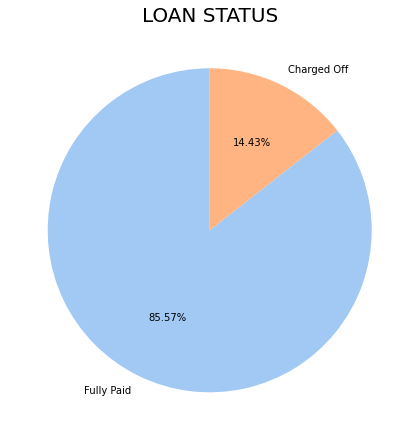

In [47]:
#Plotting Loan status variable
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(8,6))
plt.subplot(1,1,1)
plt.pie(loan_data.loan_status.value_counts(normalize=True),autopct='%.2f%%',startangle=90,labels=loan_data.loan_status.value_counts(normalize=True).index,colors=colors)
plt.title('LOAN STATUS',fontdict={'fontsize':'20'})
plt.show()

**Observation**: 85.41% Customers pay the loan on time. While 14.59% Customers defaults on loan.

Since Loan Status is our dependent variable. We will do our analysis with segmentation of the loan status variable later when we move onto segmented univariate analysis.

### addr_state

In [48]:
#Checking the Description of state address 
data_dic[data_dic['LoanStatNew']=='addr_state']['Description'][0]

'The state provided by the borrower in the loan application'

In [49]:
#checking out the unique values 
loan_data['addr_state'].nunique()

50

As there are 50 states in US , We can look at the top 20 states which covers the major part of the distribution

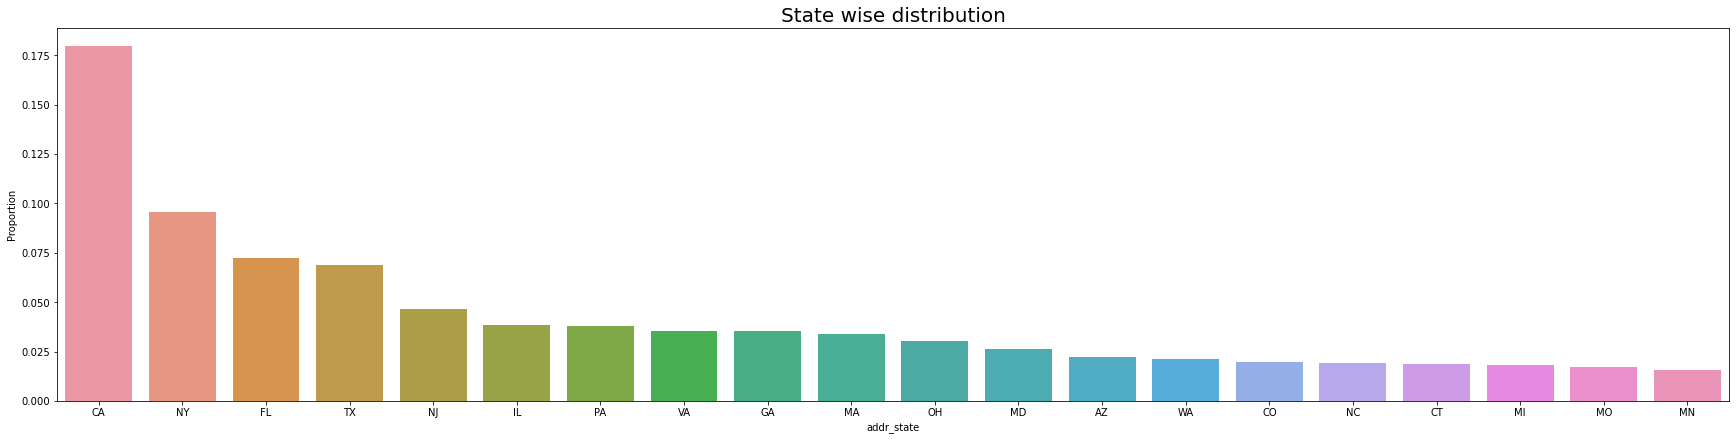

In [50]:
# Plotting the state wise Distribution among all customers
plt.figure(figsize=(24,6))

sns.barplot(x='index', y='addr_state', data=loan_data['addr_state'].value_counts(normalize=True).reset_index()[:20])
plt.xlabel('addr_state')
plt.ylabel('Proportion')
plt.title('State wise distribution', fontdict = {'fontsize' : 20})
plt.show()


**Observation** : Most of the customers were majorly from CA, NY, FL , TX and NU. 

## annual_inc

In [51]:
#Checking the Description of annual income 
data_dic[data_dic['LoanStatNew']=='annual_inc']['Description'][1]

'The self-reported annual income provided by the borrower during registration.'

In [52]:
#Looking at the variance of the variable
loan_data['annual_inc'].describe(percentiles=[0.25,0.50,0.75,0.95,0.96,0.97,0.98,0.99,0.995,0.999])

count     38493.00
mean      68822.39
std       64269.23
min        4000.00
25%       40000.00
50%       59000.00
75%       82000.00
95%      140004.00
96%      150000.00
97%      165000.00
98%      187160.64
99%      234631.68
99.5%    300000.00
99.9%    700000.00
max     6000000.00
Name: annual_inc, dtype: float64

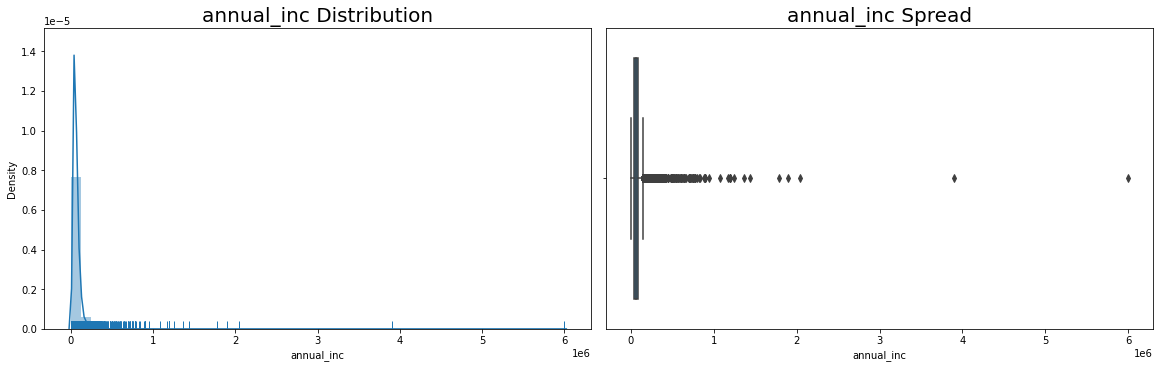

In [53]:
#Plotting the distribution of the annual income to check out the spread
Dist_box_plot('annual_inc')

**We could see high annual income in the data which is completely natural.**

In [54]:
len(loan_data[loan_data['annual_inc']>700000])

38

In [55]:
#We can take out the values greater than 667680 which is 99.9%ile . 
loan_data = loan_data[loan_data['annual_inc']<700000]

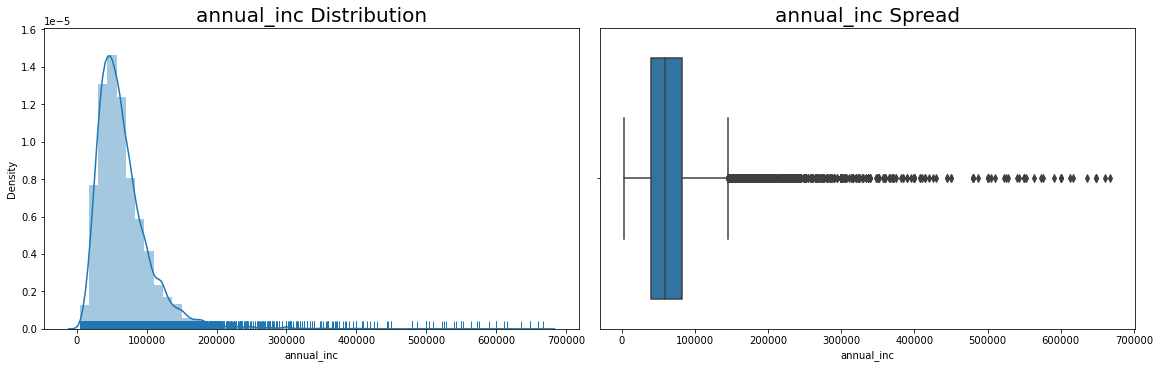

In [56]:
##Plotting the distribution of the annual income again to check out the spread
Dist_box_plot('annual_inc')

**Observation** :


We could see the spread is somewhat reduced to study the variable in detail .<br>
We can create binning of annaul income to analyze it better. 

In [57]:
#Derived Column by binning the annual income
loan_data['annual_inc_bin'] = pd.cut(loan_data['annual_inc'], [x for x in range(0, 700001, 70000)]
                                     , labels=[str(x)+'-'+str(x+70)+'k' for x in range (0, 640, 70)])



In [58]:
loan_data['annual_inc_bin'] = loan_data['annual_inc_bin'].replace({'280-350k':'280-700k','350-420k':'280-700k','490-560k':'280-700k','420-490k':'280-700k','560-630k':'280-700k','630-700k':'280-700k'})

In [59]:
loan_data['annual_inc_bin'].value_counts()

0-70k       24991
70-140k     11567
140-210k     1442
210-280k      257
280-700k      196
Name: annual_inc_bin, dtype: int64

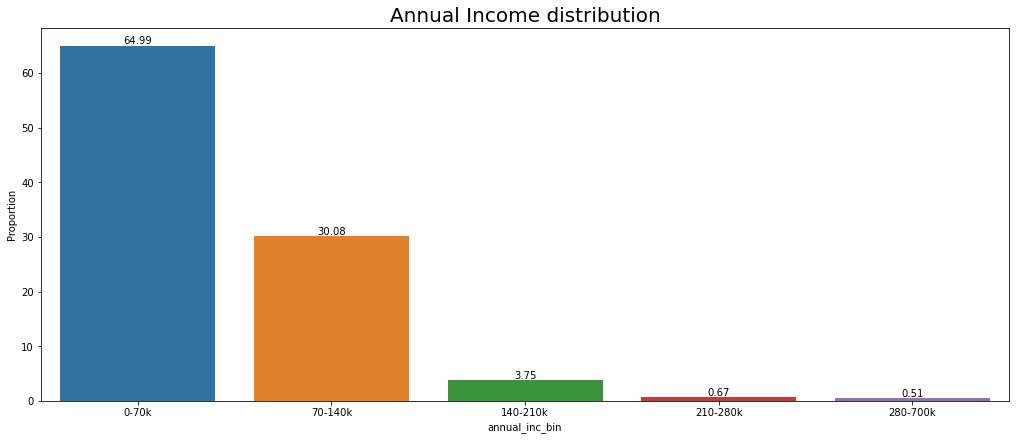

In [60]:
# Plotting the state wise Distribution among all customers
plt.figure(figsize=(14,6))
df = loan_data['annual_inc_bin'].value_counts(normalize=True).reset_index()
df['annual_inc_bin'] = round(df['annual_inc_bin']*100,2)
axx = sns.barplot(x='index', y='annual_inc_bin', data=df)
for container in axx.containers:
    axx.bar_label(container)
plt.xlabel('annual_inc_bin')
plt.ylabel('Proportion')
plt.title('Annual Income distribution', fontdict = {'fontsize' : 20})
plt.show()


**Observation**:

Most of the customers belong to 0-70k per annum income bucket, which is quite normal. 

### collection_recovery_fee

In [61]:
data_dic.iloc[2]['LoanStatNew']

'collection_recovery_fee'

In [62]:
data_dic.iloc[2]['Description']

'post charge off collection fee'

In [63]:
loan_data['collection_recovery_fee'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,0.995])

count   38453.00
mean       12.66
std       150.56
min         0.00
5%          0.00
10%         0.00
25%         0.00
50%         0.00
75%         0.00
90%         0.00
95%         5.36
99%       304.73
99.5%     631.71
max      7002.19
Name: collection_recovery_fee, dtype: float64

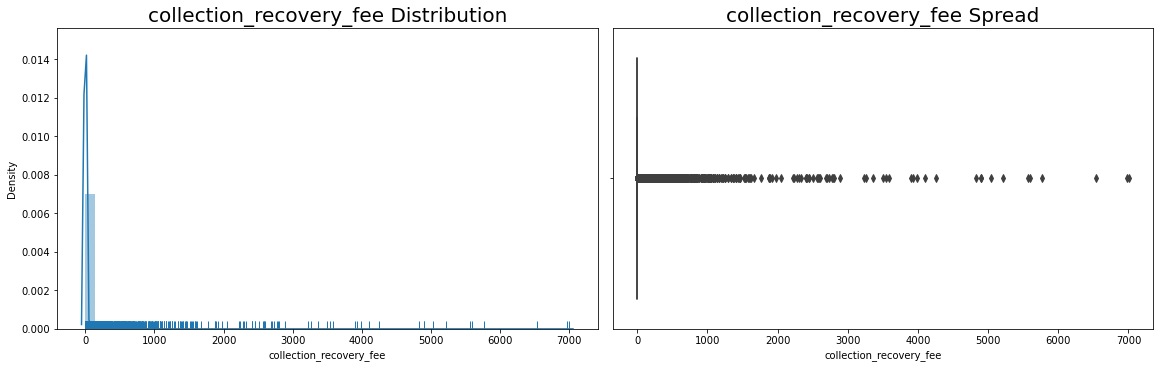

In [64]:
##Plotting the distribution of the annual income again to check out the spread
Dist_box_plot('collection_recovery_fee')

**Observation** : There are lots of outlier in the variable. We can look at the loan amount and interest rates for these customers for getting deep understanding about it.

Since this is the variable which we wont be using in our analysis , we can ignore these.

### earliest_cr_line

In [65]:
data_dic.iloc[5]['LoanStatNew']

'earliest_cr_line'

In [66]:
data_dic.iloc[5]['Description']

"The month the borrower's earliest reported credit line was opened"

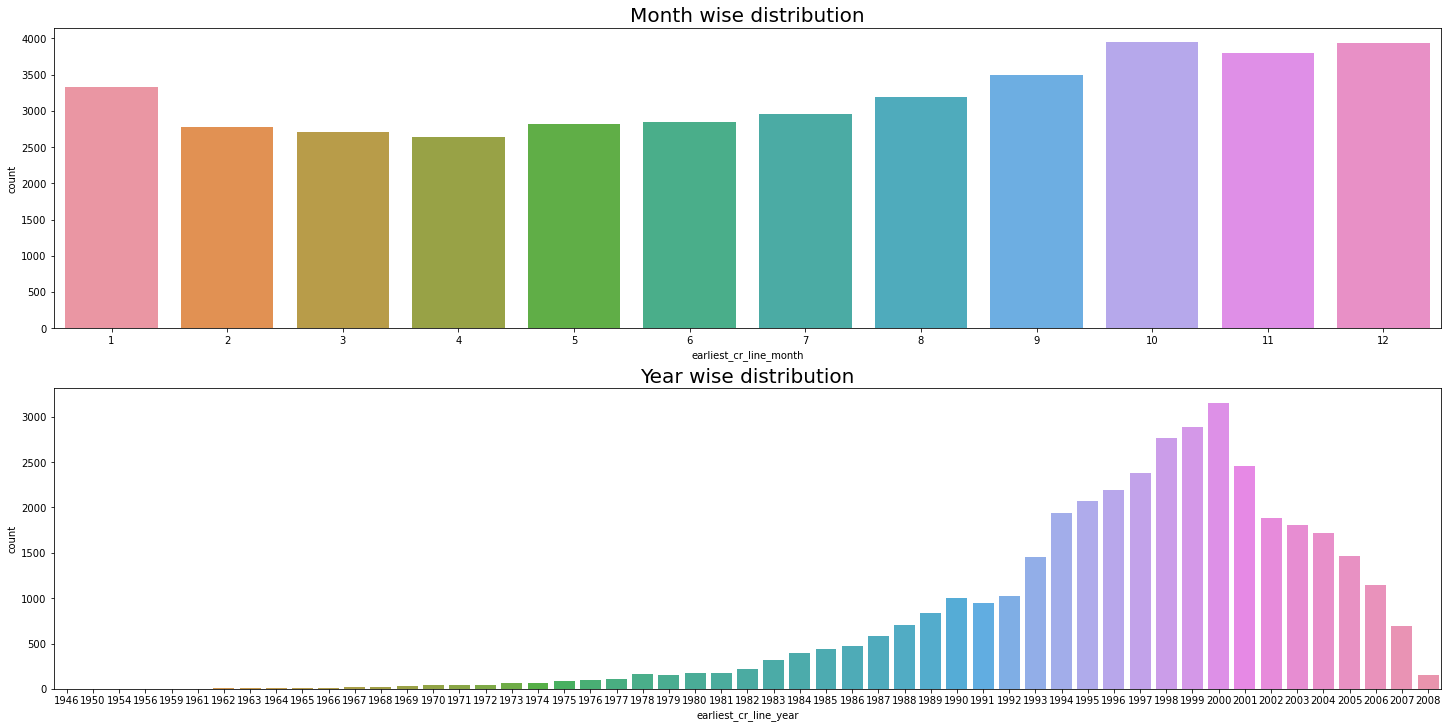

In [67]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.title("Month wise distribution", fontdict = {'fontsize' : 20})
sns.countplot(loan_data['earliest_cr_line_month'])
plt.subplot(2,1,2)
plt.title("Year wise distribution", fontdict = {'fontsize' : 20})
sns.countplot(loan_data['earliest_cr_line_year'])
plt.show()

**Observation** : 

Most of the customers were given loan in the last quarter of the year. 

Also , Most loan of credit given was in the year 2000.

### emp_length

In [68]:
data_dic.iloc[6]['LoanStatNew']

'emp_length'

In [69]:
data_dic.iloc[6]['Description']

'Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. '

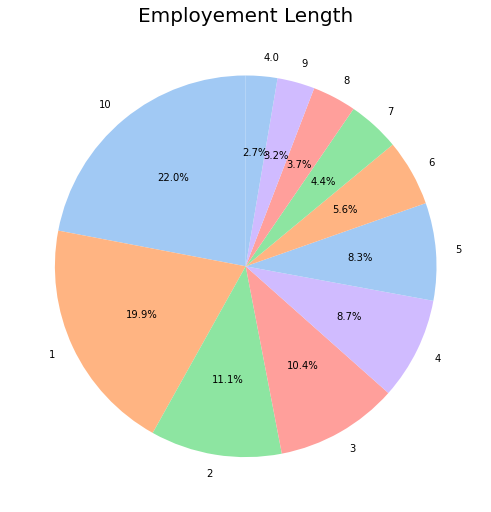

In [70]:
plt.figure(figsize=(7,7))
plt.subplot(1,1,1)
plt.pie(loan_data.emp_length.value_counts(normalize=True),autopct='%.1f%%',startangle=90,labels=loan_data.emp_length.value_counts(normalize=True).index,colors = colors)
plt.title('Employement Length',fontdict={'fontsize':'20'})
plt.show()

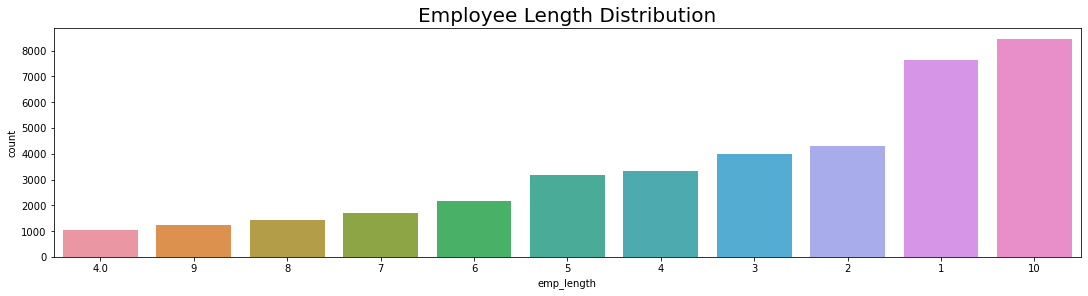

In [71]:
sns.countplot(loan_data['emp_length'],order = loan_data['emp_length'].value_counts(ascending=True).index)
plt.title("Employee Length Distribution", fontdict = {'fontsize' : 20})
plt.show()

**Observation** :

Most customers have employement length as 1 year or 10+ years. 

### funded_amnt       &emsp; and   &emsp;  funded_amnt_inv

In [72]:
data_dic.iloc[7]['LoanStatNew']

'funded_amnt'

In [73]:
data_dic.iloc[7]['Description']

'The total amount committed to that loan at that point in time.'

In [74]:
data_dic.iloc[8]['LoanStatNew']

'funded_amnt_inv'

In [75]:
data_dic.iloc[8]['Description']

'The total amount committed by investors for that loan at that point in time.'

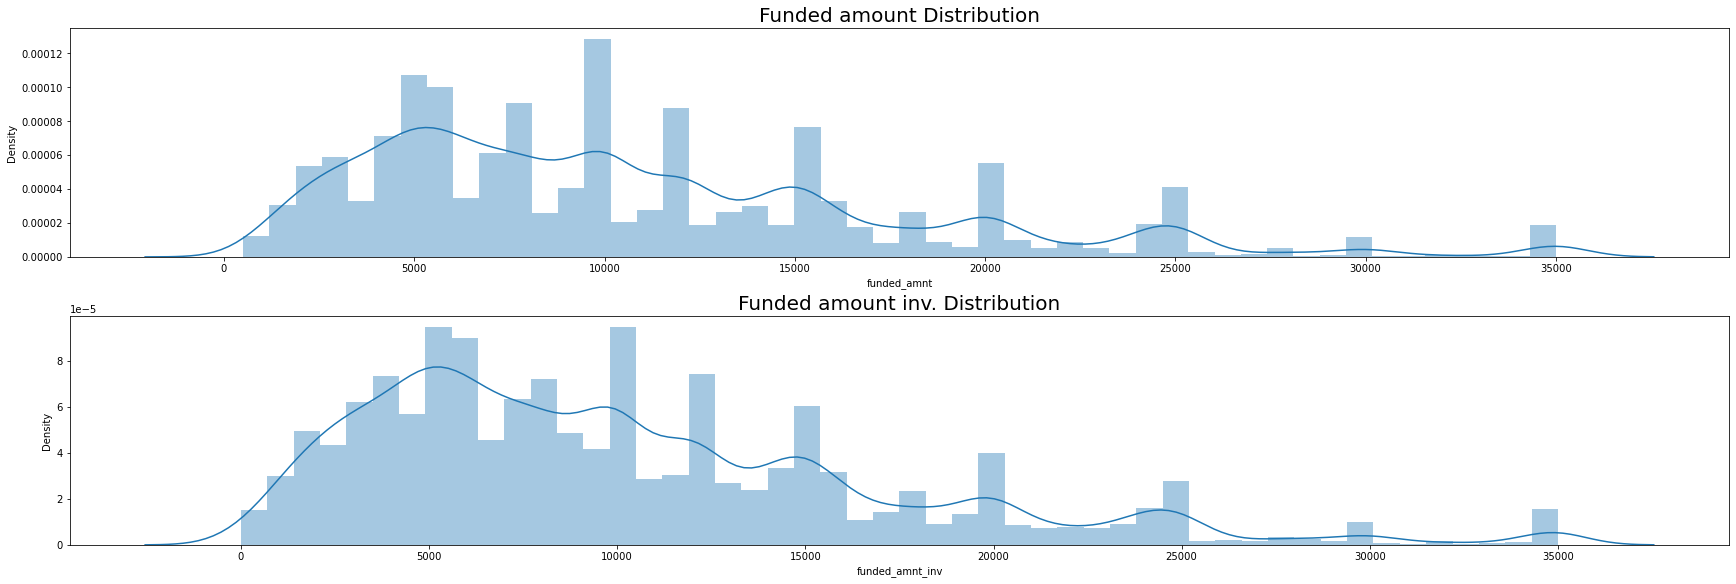

In [76]:
plt.figure(figsize=(24,8))
plt.subplot(2,1,1)
plt.title("Funded amount Distribution", fontdict = {'fontsize' : 20})
sns.distplot(loan_data['funded_amnt'])
plt.subplot(2,1,2)
plt.title("Funded amount inv. Distribution", fontdict = {'fontsize' : 20})
sns.distplot(loan_data['funded_amnt_inv'])
plt.show()

**Observation**:

As we discussed , these variables were correlated and hence could be seen and ignored in further analysis.

### grade &emsp; and &emsp;sub-grade

In [77]:
data_dic.iloc[9]['LoanStatNew']

'grade'

In [78]:
data_dic.iloc[9]['Description']

'LC assigned loan grade'

In [79]:
loan_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [80]:
loan_data['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3', 'C2',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

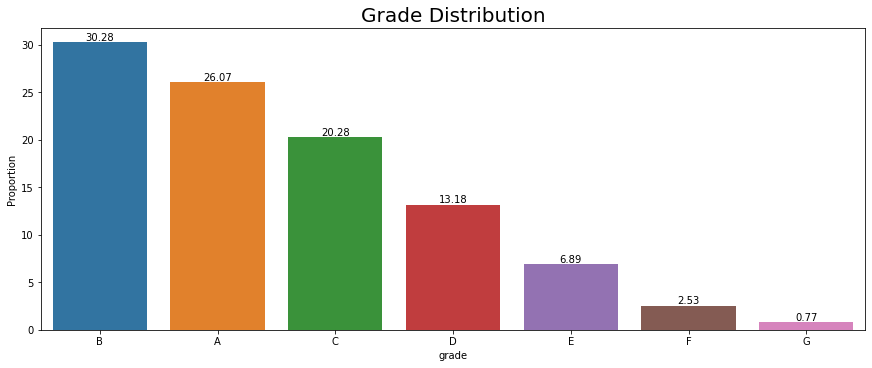

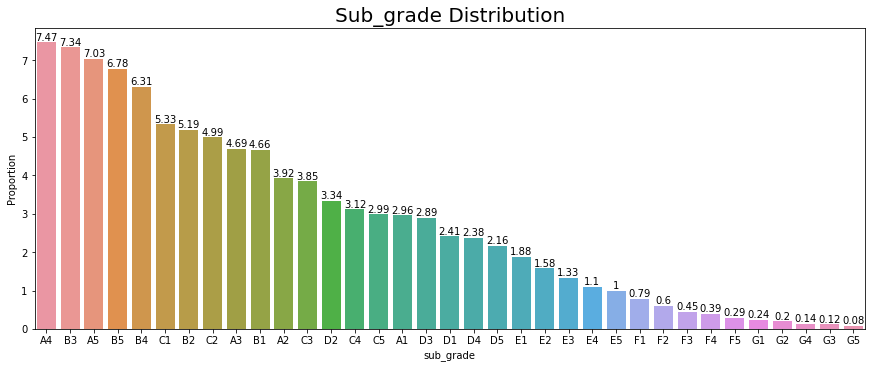

In [81]:
uni_bar_plot('grade')
uni_bar_plot('sub_grade')

**Observation** : 

The distribution decreases as the grade decreases. 

Most of the emmployees are in A and B grades and subsequent sub grades. 

### home_ownership

In [82]:
data_dic.iloc[10]['LoanStatNew']

'home_ownership'

In [83]:
data_dic.iloc[10]['Description']

'The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.'

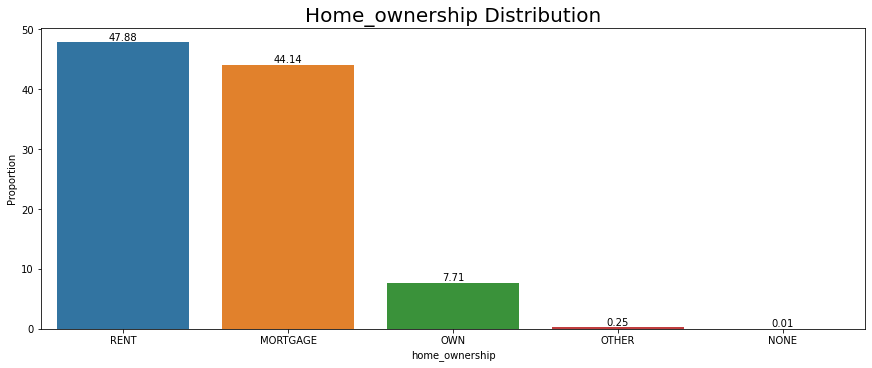

In [84]:
uni_bar_plot('home_ownership')
#sns.countplot(loan_data['home_ownership'],order=loan_data['home_ownership'].value_counts().index)

**Observation**:

Most of the customers home ownership is Rent or Mortgage .

### installment

In [85]:
data_dic.iloc[13]['LoanStatNew']

'installment'

In [86]:
data_dic.iloc[13]['Description']

'The monthly payment owed by the borrower if the loan originates.'

In [87]:
loan_data['installment'].describe()

count   38453.00
mean      322.54
std       208.49
min        15.69
25%       165.74
50%       278.07
75%       425.55
max      1305.19
Name: installment, dtype: float64

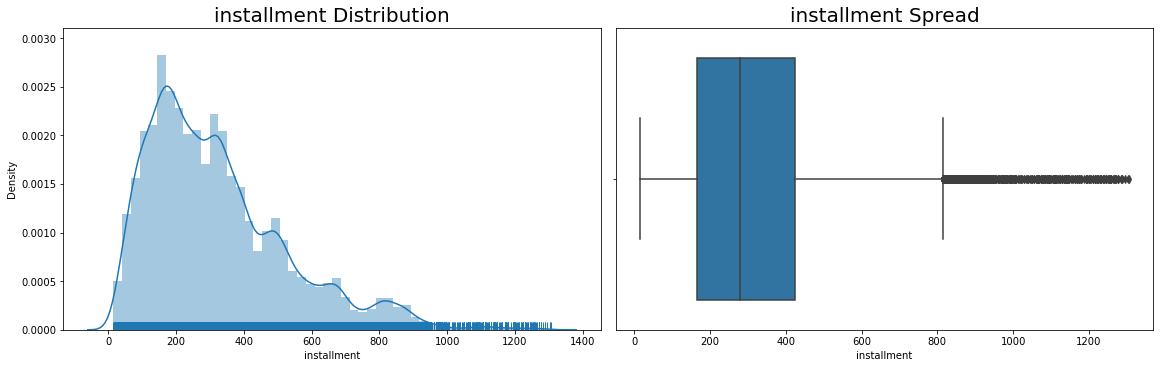

In [88]:
Dist_box_plot('installment')

**Observation** : 

The installment is positively skewed which is quite normal as installment tend to be less for customers but we have few anomalies as well but its normal as high loan amount will have higher installments.

### int_rate

In [89]:
data_dic.iloc[14]['LoanStatNew']

'int_rate'

In [90]:
data_dic.iloc[14]['Description']

'Interest Rate on the loan'

In [91]:
loan_data['int_rate'].describe()

count   38453.00
mean       11.93
std         3.69
min         5.42
25%         8.94
50%        11.71
75%        14.35
max        24.40
Name: int_rate, dtype: float64

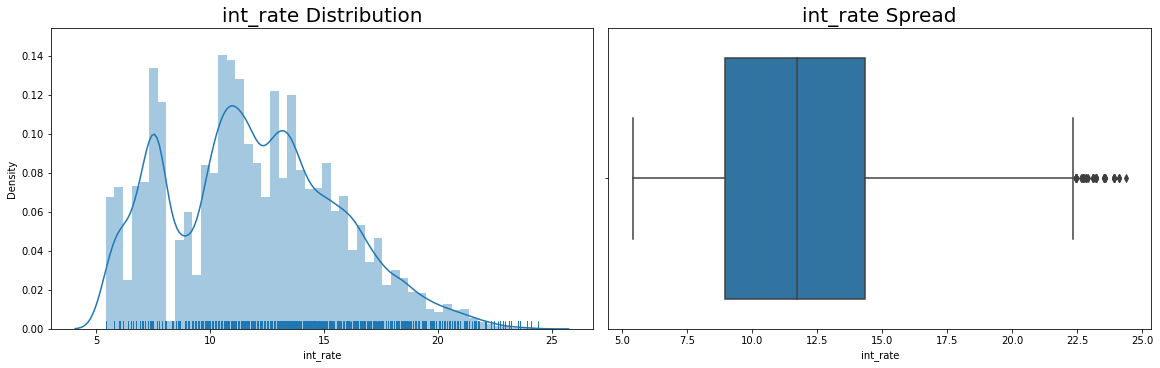

In [92]:
Dist_box_plot('int_rate')

**Observation**:

The interest rate is slightly in tiled towards positive with median around 11.7 . 

We can have few values with higher interest rates as well.

### issue_d

In [93]:
data_dic.iloc[15]['LoanStatNew']

'issue_d'

In [94]:
data_dic.iloc[15]['Description']

'The month which the loan was funded'

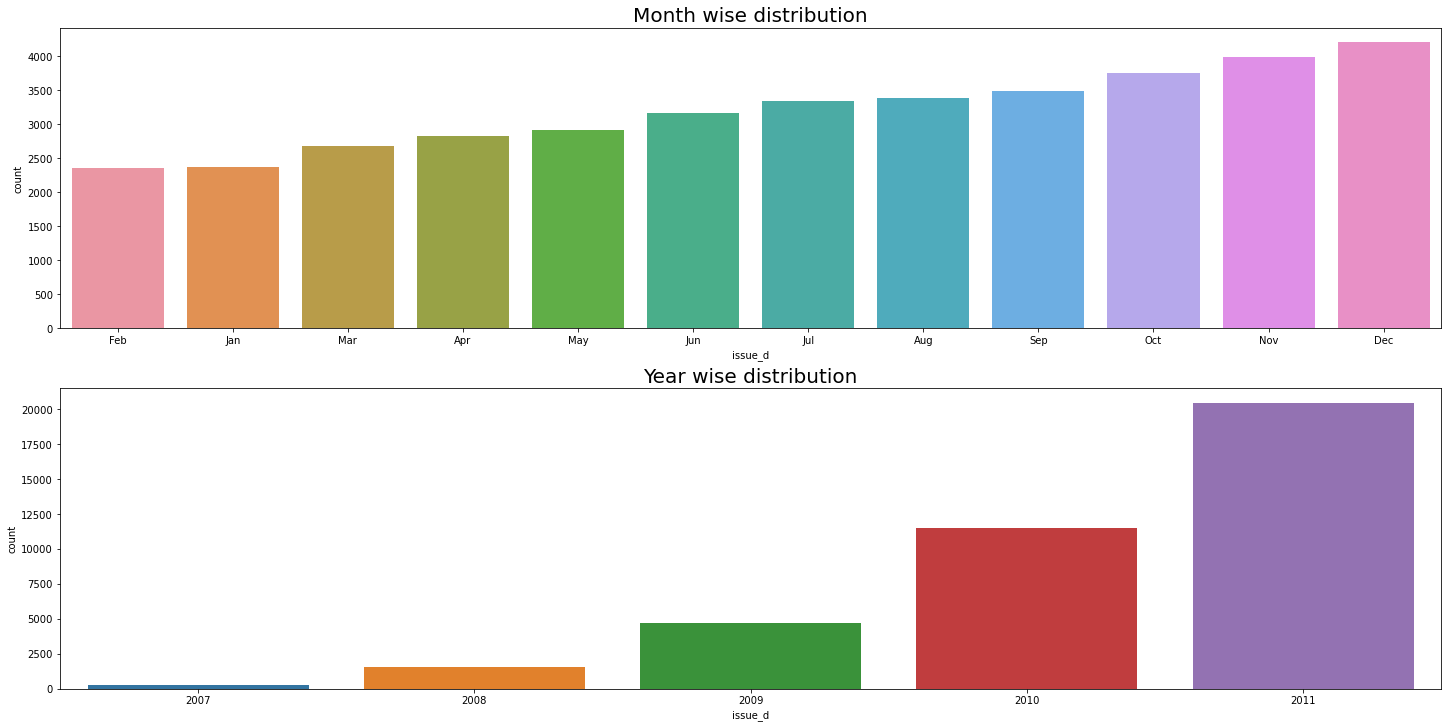

In [95]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.title("Month wise distribution", fontdict = {'fontsize' : 20})
sns.countplot(loan_data['issue_d'].dt.strftime('%b'),order = loan_data['issue_d'].dt.strftime('%b').value_counts(ascending=True).index)
plt.subplot(2,1,2)
plt.title("Year wise distribution", fontdict = {'fontsize' : 20})
sns.countplot(loan_data['issue_d'].dt.year,order = loan_data['issue_d'].dt.year.value_counts(ascending=True).index)
plt.show()

**Observation** : 

The company is lending loan more each year than the previous years .

Also, the frequency is increasing in the each subsequent month of the year . 

### last_credit_pull_d

In [96]:
data_dic.iloc[16]['LoanStatNew']

'last_credit_pull_d'

In [97]:
data_dic.iloc[16]['Description']

'The most recent month LC pulled credit for this loan'

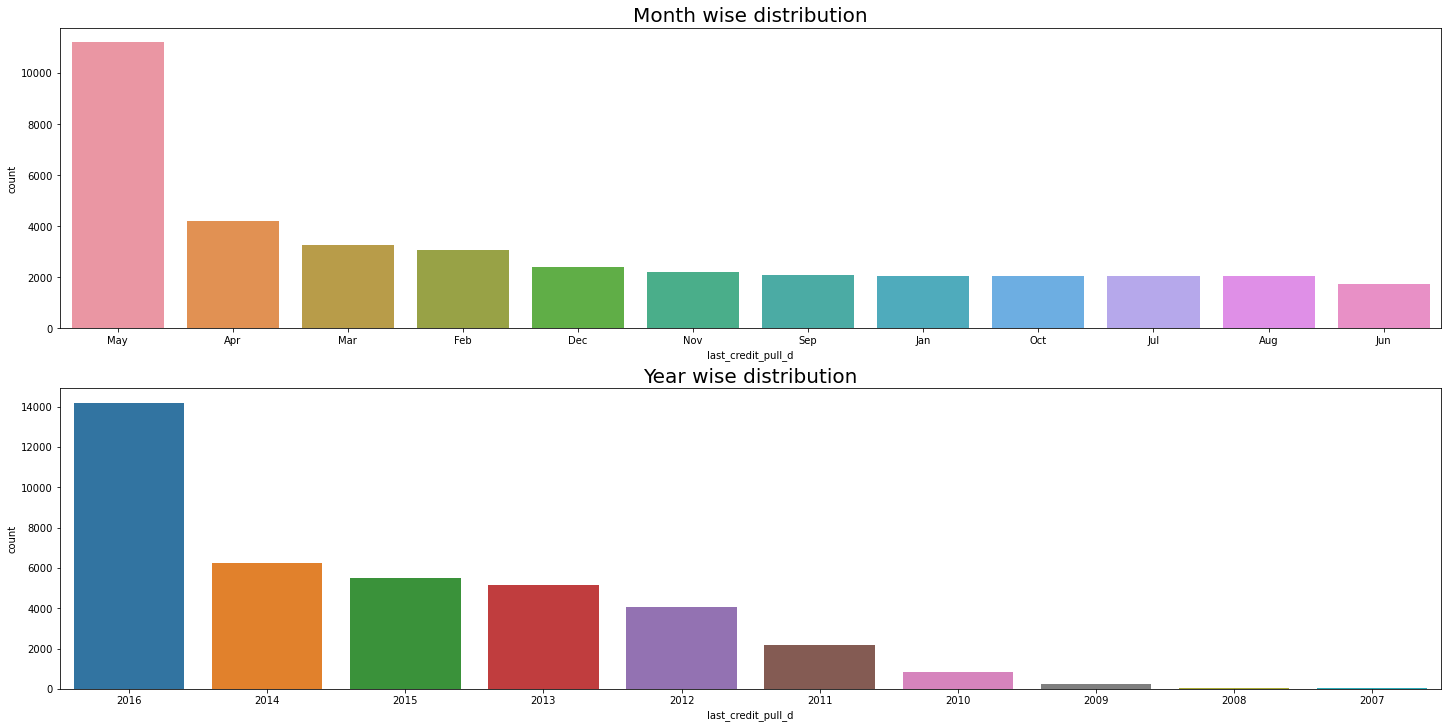

In [98]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.title("Month wise distribution", fontdict = {'fontsize' : 20})
sns.countplot(loan_data['last_credit_pull_d'].dt.strftime('%b'),order = loan_data['last_credit_pull_d'].dt.strftime('%b').value_counts().index)
plt.subplot(2,1,2)
plt.title("Year wise distribution", fontdict = {'fontsize' : 20})
sns.countplot(loan_data['last_credit_pull_d'].dt.year,order = loan_data['last_credit_pull_d'].dt.year.value_counts().index)
plt.show()

**Observation**:
    
The club pulls the credit mostly in the months of May , April and March. 

### loan_amnt

In [99]:
loan_data['loan_amnt'].describe()

count   38453.00
mean    11049.79
std      7343.85
min       500.00
25%      5300.00
50%      9600.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

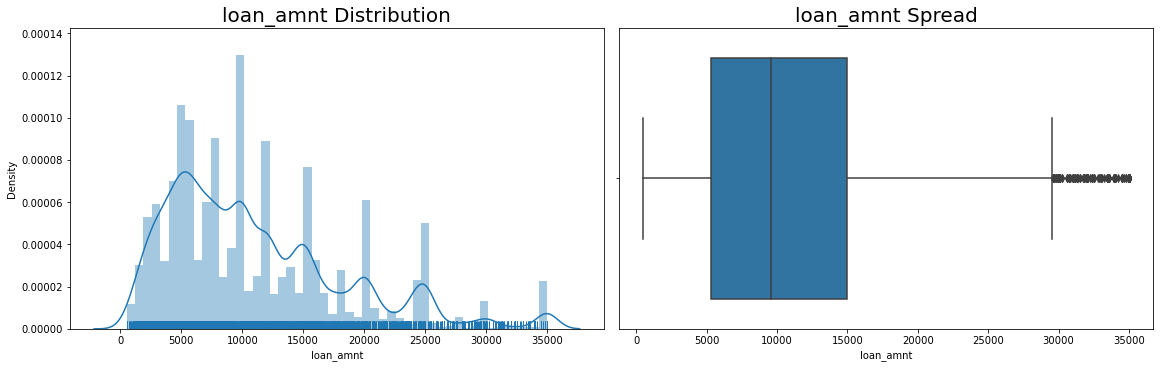

In [100]:
Dist_box_plot('loan_amnt')


**Observation** :

Loan amount is also slightly positive skewed and it all makes sense as customers will have lower loan amount.

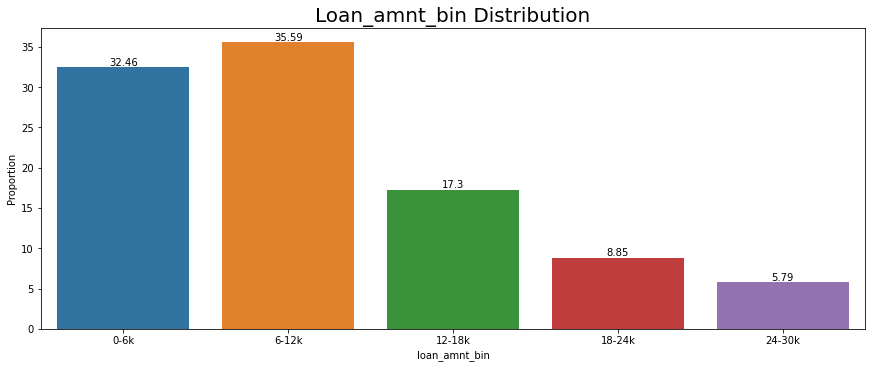

In [101]:
uni_bar_plot('loan_amnt_bin')


**Observation** :

The proportion of loan amount is more in 6-12k as compared to others.

### Term

In [102]:
loan_data['term'].value_counts()

36    29006
60     9447
Name: term, dtype: int64

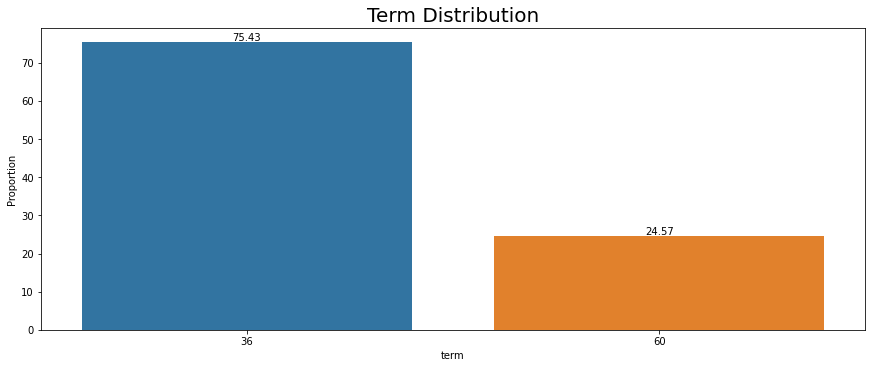

In [103]:
uni_bar_plot('term')

**Observation** : 
    
The proportion of term is 75% for 36 months as compared to 25% of 60 months. 

Customers end up investing for 36 months more rather than 60 months.

### verification_status

In [104]:
loan_data['verification_status'].value_counts()

Not Verified       16631
Verified           12176
Source Verified     9646
Name: verification_status, dtype: int64

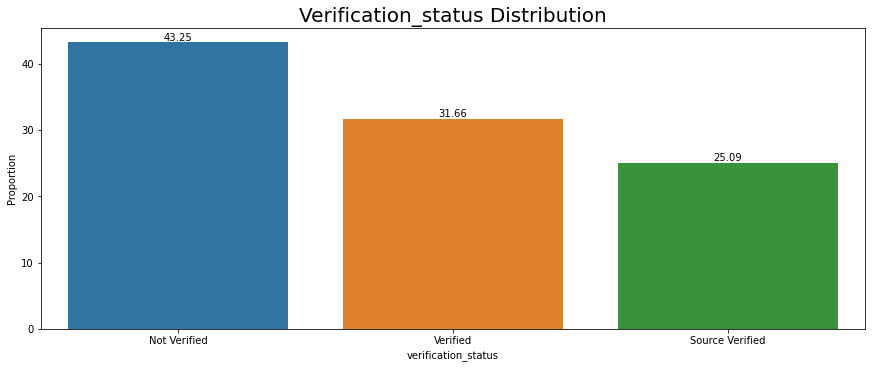

In [105]:
uni_bar_plot('verification_status')

**Observation** : 
    
Lot of customers are not verified . 
    
We will look at this variable with the segmentation of loan status variable. 

We could summarize that below variables are more important for our analysis:
    
- Annual Income
- Loan Amount
- Interest Rate
- Grade
- Term
- Issue Date
- Home ownership
- Verification Status
- Employement Length

## Univariate Analysis (Segmentation with Loan Status Variable)

Our aim is to see the relationship of variables with the loan status variable so that we can look at the factors deriving customers to default on loan. 

#### Custom function for plots 

In [106]:
#Displays values in percentage
def percent_versus_target(i):
    return loan_data.groupby('loan_status')[i].value_counts(normalize=True) * 100

In [107]:
#Proportion plot for checking the true essence of the data
def plot_vs_loan(i):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(20,6)
    df = loan_data[loan_data['loan_status']=='Fully Paid'][i].value_counts(normalize=True).reset_index()
    df[i] = round(df[i]*100,2)
    axx = sns.barplot(x='index', y=i, data=df, ax=ax[0])
    for container in axx.containers:
        axx.bar_label(container)
    ax[0].set_title('Customers Paid', fontdict = {'fontsize' : 20})
    df = loan_data[loan_data['loan_status']=='Charged Off'][i].value_counts(normalize=True).reset_index()
    df[i] = round(df[i]*100,2)
    axy = sns.barplot(x='index', y=i, data=df, ax=ax[1])
    for container in axy.containers:
        axy.bar_label(container)
    ax[1].set_title('Customers Defaulted', fontdict = {'fontsize' : 20})
    plt.ylabel('Proportion')
    plt.show()

In [108]:
#Plotting countplot for variable 
def plot_versus_loan(i,rotate=0): 
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(20,6)
    sns.countplot(loan_data[loan_data.loan_status=='Fully Paid'][i], ax=ax[0],order=loan_data[i].value_counts(normalize=True).index)
    ax[0].set_title('Customers Paid', fontdict = {'fontsize' : 20})
    sns.countplot(loan_data[loan_data.loan_status=='Charged Off'][i], ax=ax[1],order=loan_data[i].value_counts(normalize=True).index)
    ax[1].set_title('Customers Defaulted', fontdict = {'fontsize' : 20})
    if len(loan_data[i].value_counts().index)>2:
        ax[0].set_xticklabels(loan_data[i].value_counts().index, rotation=rotate)
        ax[1].set_xticklabels(loan_data[i].value_counts().index, rotation=rotate)
    plt.show()

In [109]:
##Plotting countplot for variable in seperate rows for looking at the spread
def plot_versus_loan_up_down(i,rotate=0): 
    fig, ax = plt.subplots(2,1)
    fig.set_size_inches(20,6)
    sns.countplot(loan_data[loan_data.loan_status=='Fully Paid'][i], ax=ax[0],order=loan_data[i].value_counts(normalize=True).index)
    ax[0].set_title('Customers Paid', fontdict = {'fontsize' : 20})
    sns.countplot(loan_data[loan_data.loan_status=='Charged Off'][i], ax=ax[1],order=loan_data[i].value_counts(normalize=True).index)
    ax[1].set_title('Customers Defaulted', fontdict = {'fontsize' : 20})
    if len(loan_data[i].value_counts().index)>2:
        ax[0].set_xticklabels(loan_data[i].value_counts().index, rotation=rotate)
        ax[1].set_xticklabels(loan_data[i].value_counts().index, rotation=rotate)
    plt.show()

In [110]:
#Distribution and box plots
def bi_plots(var):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plt.title(f"{var} Distribution", fontdict = {'fontsize' : 20})
    sns.distplot(loan_data[(loan_data['loan_status']=='Fully Paid') ][var], hist=False,rug=True)
    sns.distplot(loan_data[(loan_data['loan_status']=='Charged Off') ][var], hist=False,rug=True)
    plt.subplot(1,2,2)
    plt.title(f"{var} vs Loan Status", fontdict = {'fontsize' : 20})
    sns.boxplot(x='loan_status', y=var,data=loan_data)
    plt.show()

### Loan Amount vs Loan Status

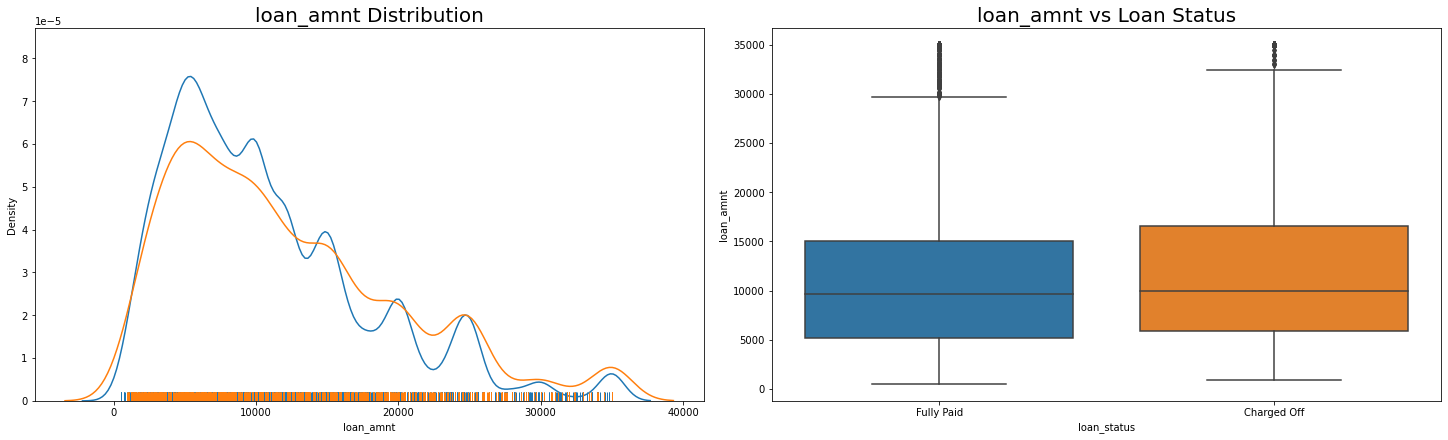

In [111]:
#Plotting loan amount 
bi_plots('loan_amnt')

**Observation** :

The loan amount distribution is slightly Positively skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value) for both Fully paid and Charged off Customers.<br>
Charged off loans are shifted towards higher average loan amount request.<br>
We can analyze the bin variable to deep dive into loan amount.

In [112]:
percent_versus_target('loan_amnt_bin')

loan_status        
Charged Off  6-12k    32.63
             0-6k     29.86
             12-18k   18.87
             18-24k   10.80
             24-30k    7.84
Fully Paid   6-12k    36.08
             0-6k     32.89
             12-18k   17.04
             18-24k    8.53
             24-30k    5.45
Name: loan_amnt_bin, dtype: float64

The percentage distribution slightly increase as the loan amount increases in case of charged off employees <br>**We can look at the proportion of loan amount after binning in the below graph.**

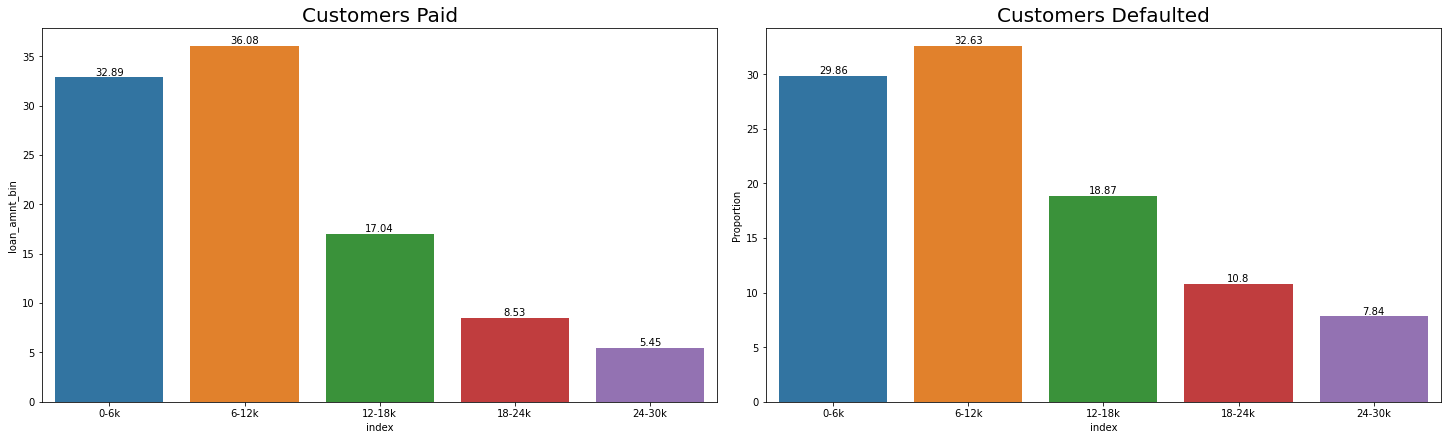

In [113]:
plot_vs_loan('loan_amnt_bin')

**Observation**:

The percentage for defaulted customers increases as the loan amount increases beyond 12k Limit. 

### Interest Rate vs Loan Status

In [114]:
loan_data['int_rate'].describe()

count   38453.00
mean       11.93
std         3.69
min         5.42
25%         8.94
50%        11.71
75%        14.35
max        24.40
Name: int_rate, dtype: float64

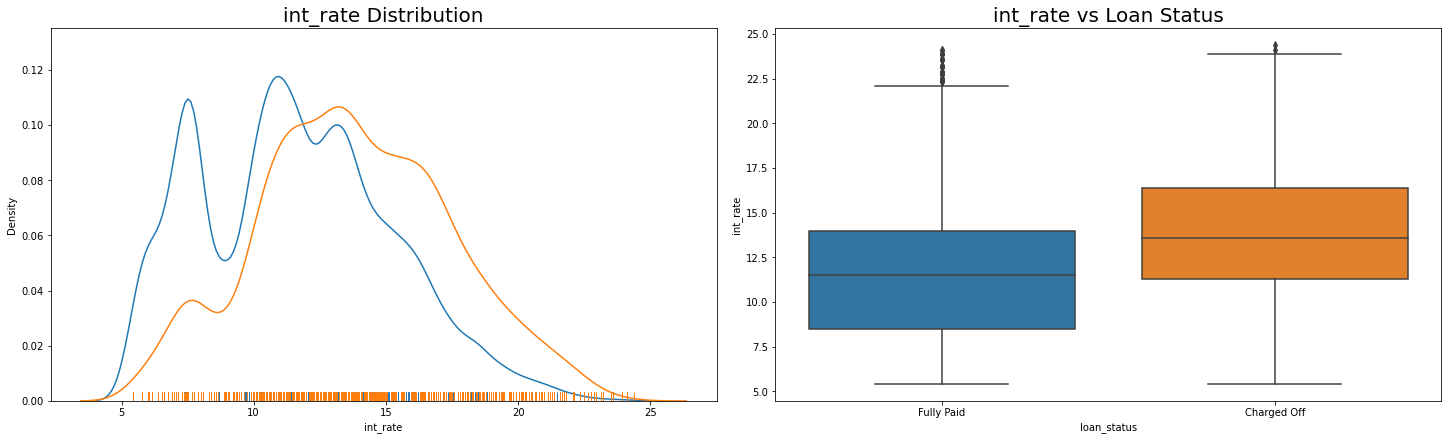

In [115]:
bi_plots('int_rate')

**Observation** :

Overall, the intrest rate varies from 5.41% to 24.40% with average intrest rate of 11.93%.<br>
- The interest rate for Charged Off loans appear to be higher than for Fully paid. <br> 
- As, the risk increases the rate of interest imposed on the loan also increases.

### Installment vs Loan Status

In [116]:
loan_data.groupby('loan_status')['installment'].describe()

count   mean    std   min    25%    50%    75%     max
loan_status                                                          
Charged Off  5548.00 337.17 216.76 22.79 169.66 294.96 458.85 1305.19
Fully Paid  32905.00 320.07 206.97 15.69 165.27 275.64 420.47 1295.21

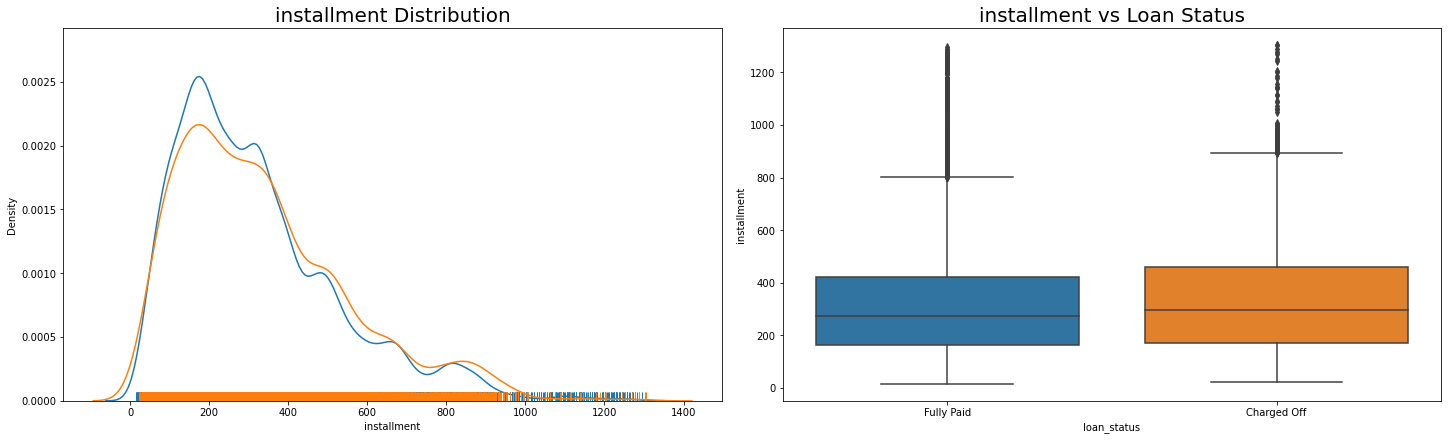

In [117]:
bi_plots('installment')

**Observation**: 

The installment is also positively skewed and the default rate increases with the increase in installment

### Home Ownership vs Loan Status

In [118]:
percent_versus_target('home_ownership')

loan_status  home_ownership
Charged Off  RENT             50.16
             MORTGAGE         41.62
             OWN               7.89
             OTHER             0.32
Fully Paid   RENT             47.50
             MORTGAGE         44.57
             OWN               7.68
             OTHER             0.24
             NONE              0.01
Name: home_ownership, dtype: float64

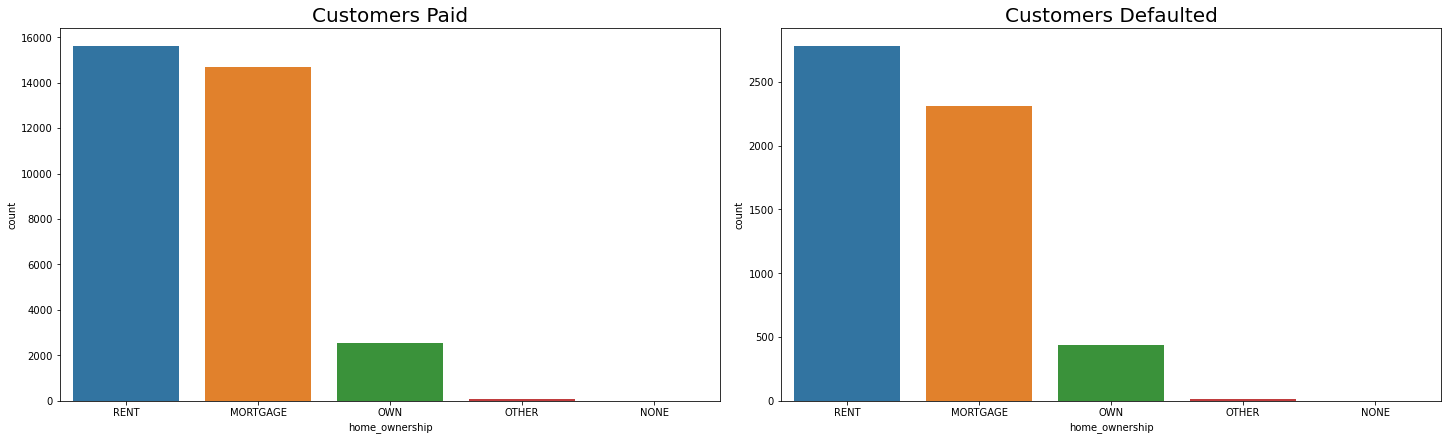

In [119]:
plot_versus_loan('home_ownership')

**Observation** : Customers who defaulted has much higher distribution in Rent as compared to customers who paid the loan on time.

### Grade vs Loan Status

In [120]:
percent_versus_target('grade')

loan_status  grade
Charged Off  B       25.38
             C       23.79
             D       19.90
             E       12.69
             A       10.74
             F        5.71
             G        1.78
Fully Paid   B       31.10
             A       28.66
             C       19.69
             D       12.04
             E        5.92
             F        1.99
             G        0.60
Name: grade, dtype: float64

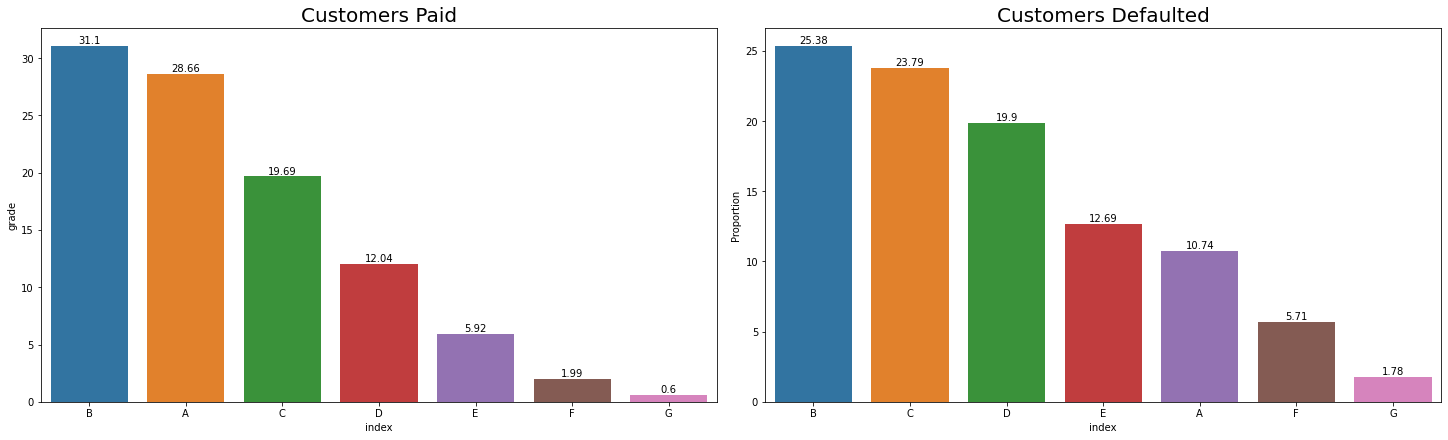

In [121]:
plot_vs_loan('grade')

**Observation**: 

Default rate increases as the Grade Decreases.<br>
The Default rate increases for **D,E,F** and **G** grades.We can look at the sub grades for each grade which can give us the detailed view of grade strucuture. 

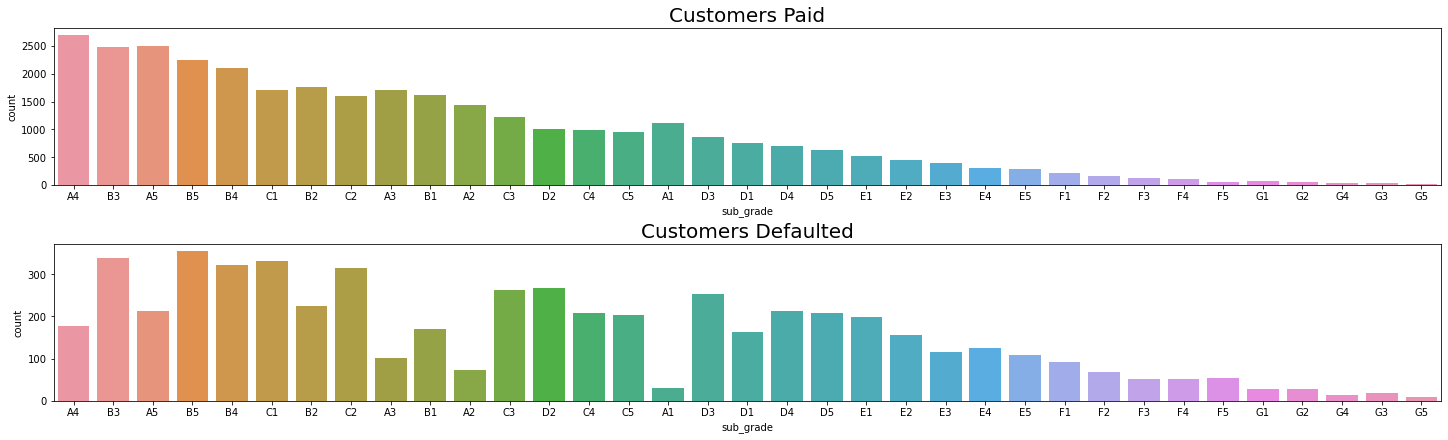

In [122]:
plot_versus_loan_up_down('sub_grade')

**Observation** :

The subgrades which comes under grades D E F and G are most likely to default.

## Term vs Loan Status

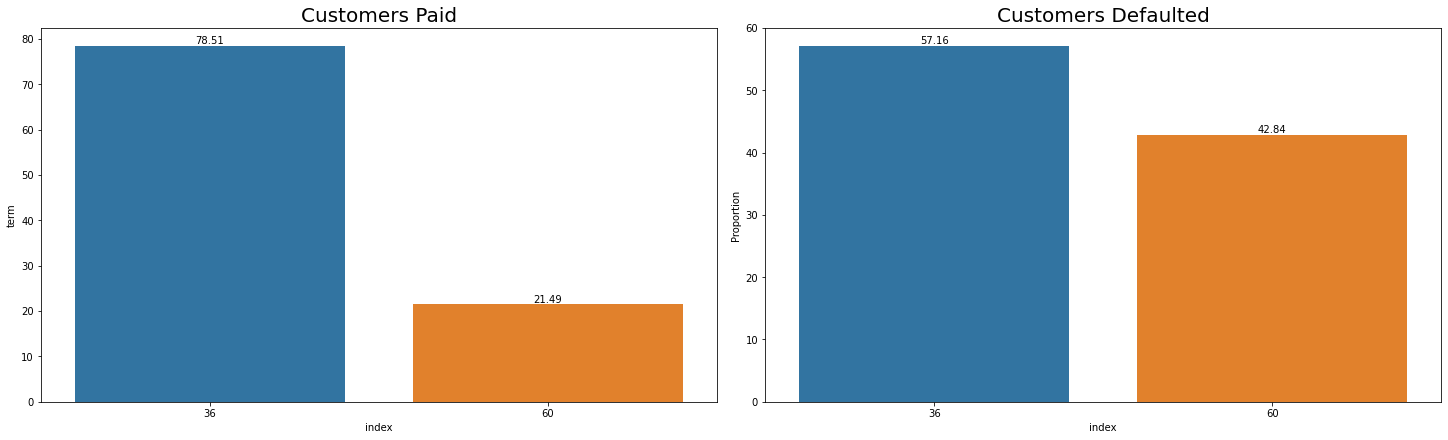

In [123]:
plot_vs_loan('term')

**Observation** :

The Defaulted Customers tend to take loan for 60 terms as compared to 36 months.

### verification_status vs Loan Status

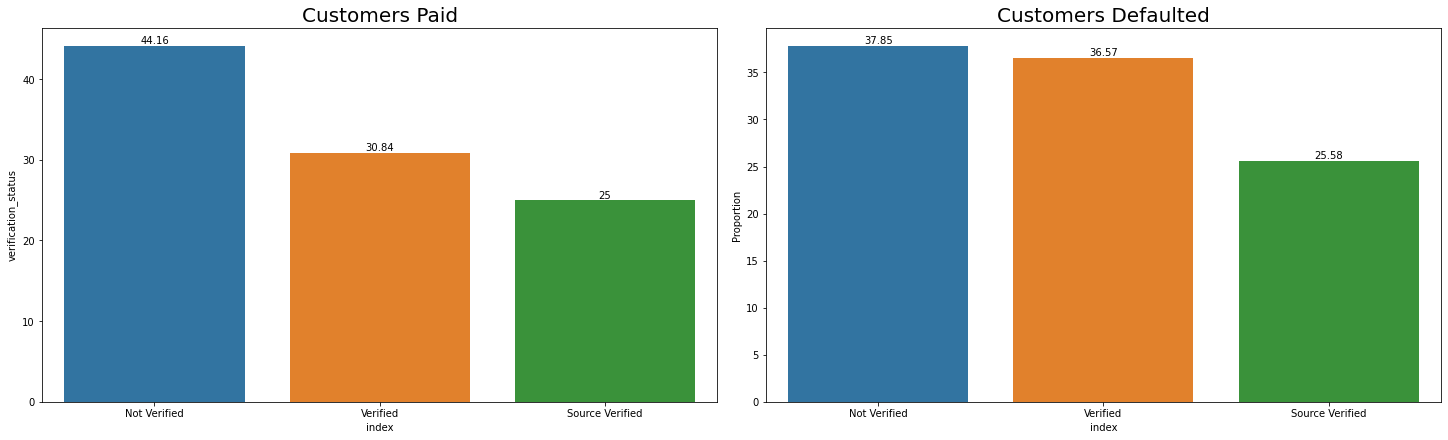

In [124]:
plot_vs_loan('verification_status')

**Observation** :

Suprisingly , The verified customers tend to charge off more as compared to fully paid customers.<br>
We will look deep into this in Bi Variate analysis.

### emp_length Vs Loan status

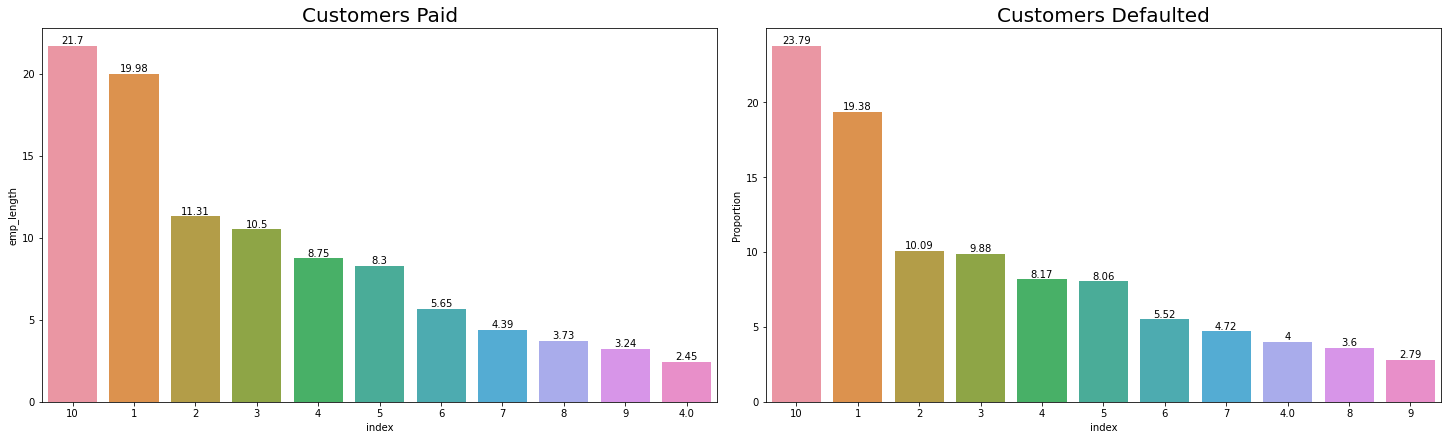

In [125]:
plot_vs_loan('emp_length')

**Observation** :
    
No such relevant insight from the length of employement.

### Purpose vs Loan status

In [126]:
percent_versus_target('purpose')

loan_status  purpose           
Charged Off  debt_consolidation   49.30
             other                11.23
             credit_card           9.72
             small_business        8.38
             home_improvement      6.18
             major_purchase        3.89
             car                   2.88
             medical               1.89
             moving                1.64
             wedding               1.62
             house                 1.03
             educational           0.96
             vacation              0.96
             renewable_energy      0.32
Fully Paid   debt_consolidation   46.40
             credit_card          13.62
             other                 9.80
             home_improvement      7.66
             major_purchase        5.84
             car                   4.07
             small_business        3.88
             wedding               2.52
             medical               1.74
             moving                1.47
        

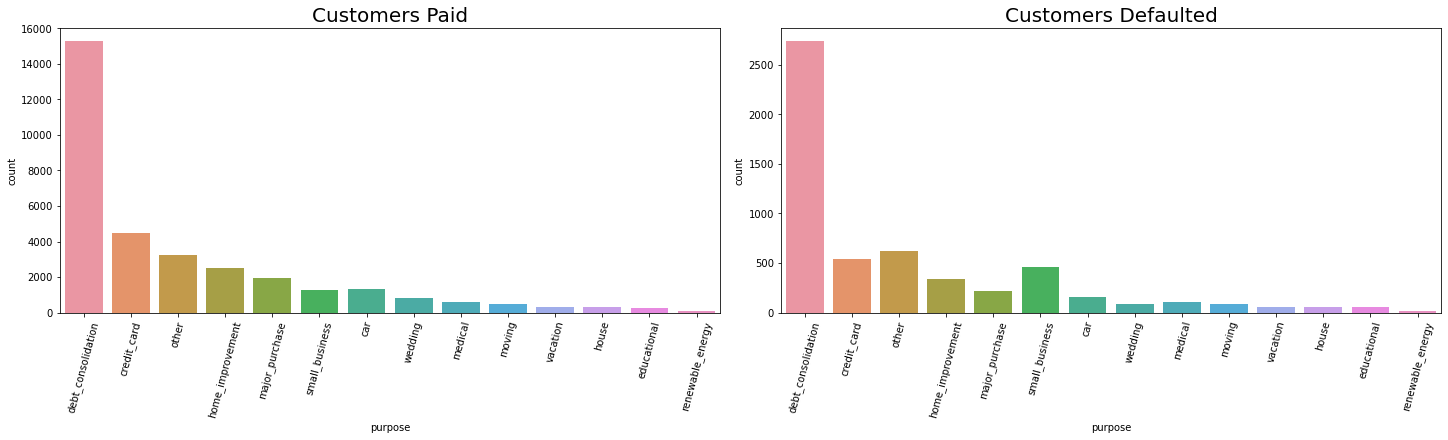

In [127]:
plot_versus_loan('purpose',75)

**Observation** : 

Small business tend to default more,followed by debt consolidation 

### Address state vs Loan status

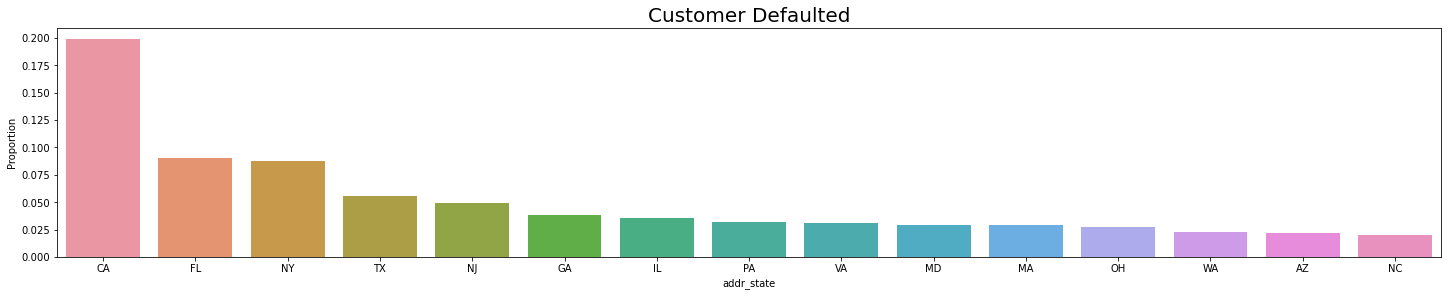

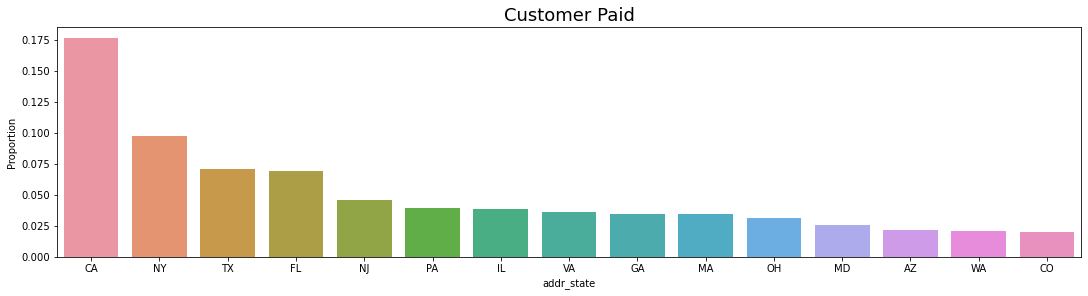

In [128]:
plt.figure(figsize=(20,4))

sns.barplot(x='index', y='addr_state', data=loan_data[loan_data['loan_status']=='Charged Off']['addr_state'].value_counts(normalize=True).reset_index()[:15])
plt.xlabel('addr_state')
plt.ylabel('Proportion')
plt.title('Customer Defaulted', fontdict = {'fontsize' : 20})
plt.show()

sns.barplot(x='index', y='addr_state', data=loan_data[loan_data['loan_status']=='Fully Paid']['addr_state'].value_counts(normalize=True).reset_index()[:15])
plt.xlabel('addr_state')
plt.ylabel('Proportion')
plt.title('Customer Paid', fontdict = {'fontsize' : 18})
plt.show()

**Observation** : The Customers who defaulted where mainly from CA, FL , NY and TX.


### delinq_2yrs vs Loan Status

In [129]:
loan_data['delinq_2yrs'].value_counts()

0     34280
1      3195
2       671
3       209
4        59
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

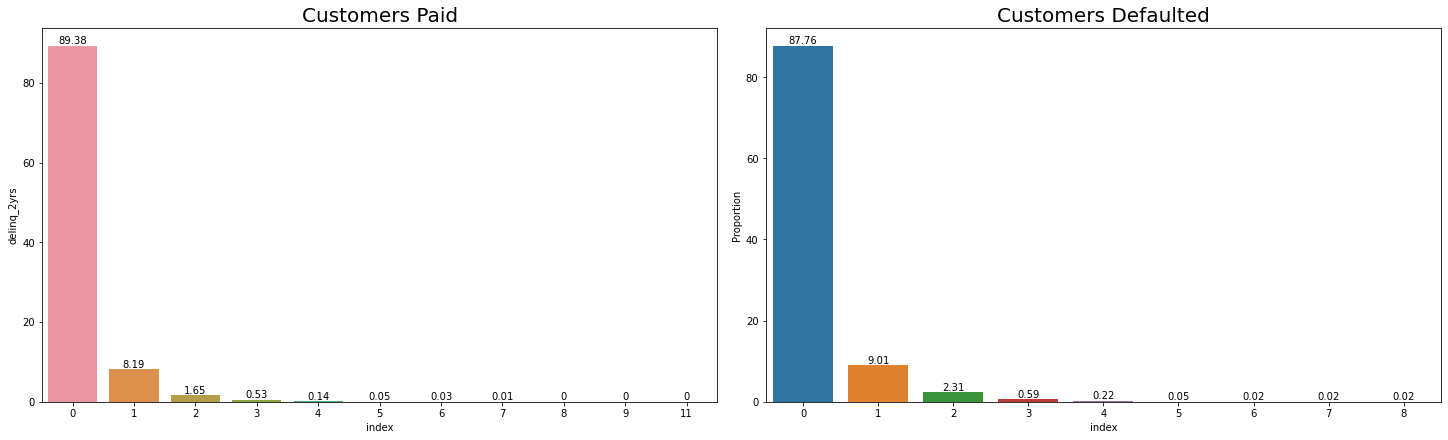

In [130]:
plot_vs_loan('delinq_2yrs')

**Observation**:
    


### inq_last_6mths vs Loan Status

In [131]:
percent_versus_target('inq_last_6mths')

loan_status  inq_last_6mths
Charged Off  0                40.54
             1                29.90
             2                16.78
             3                10.89
             4                 0.87
             5                 0.50
             6                 0.29
             7                 0.18
             8                 0.05
Fully Paid   0                49.88
             1                27.26
             2                14.28
             3                 7.18
             4                 0.80
             5                 0.35
             6                 0.14
             7                 0.07
             8                 0.03
Name: inq_last_6mths, dtype: float64

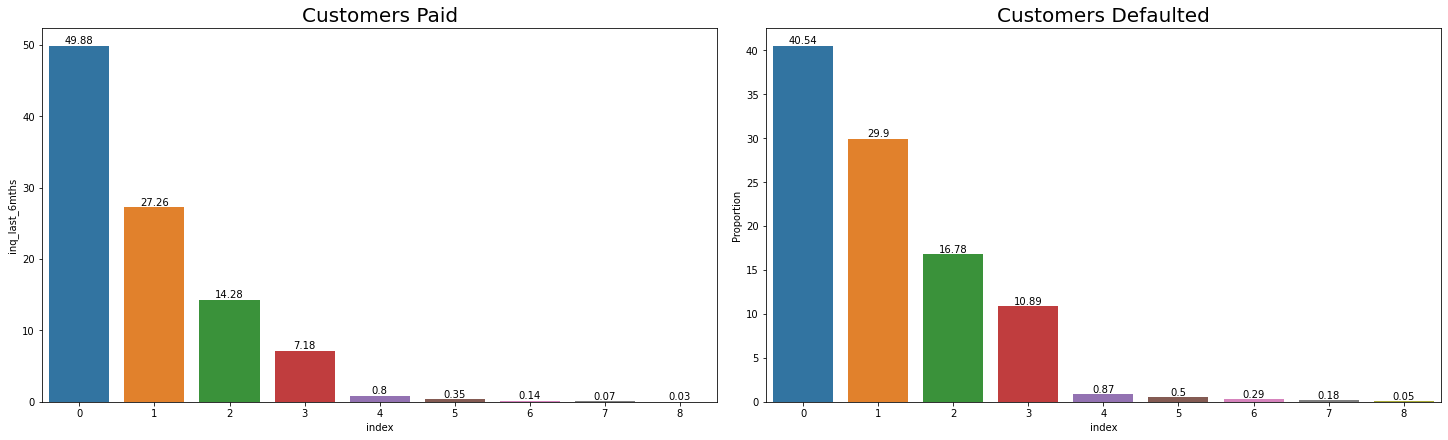

In [132]:
plot_vs_loan('inq_last_6mths')

**Observation**:


### pub_rec vs Loan status

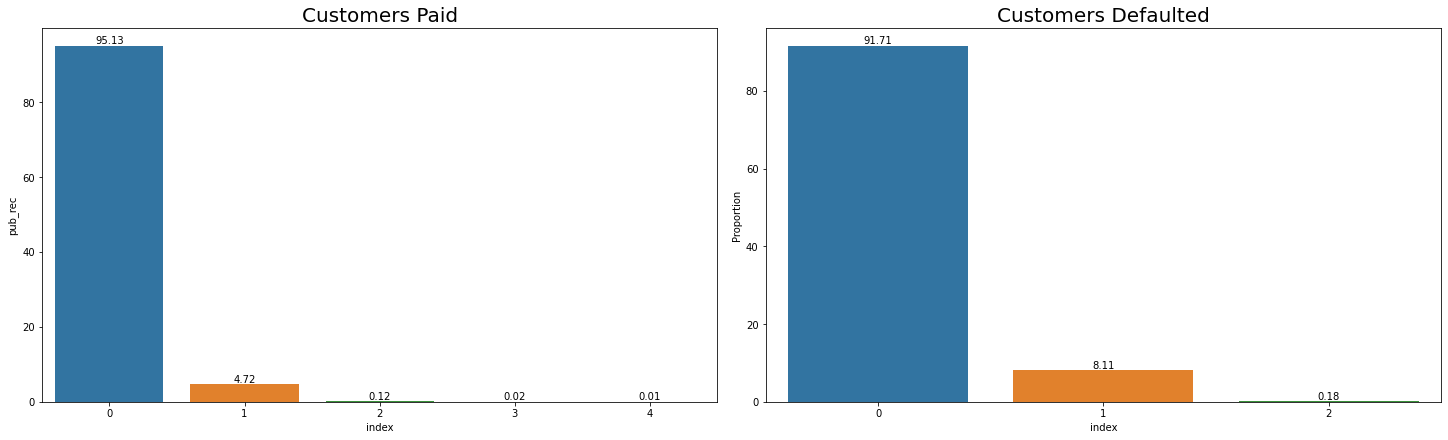

In [133]:
plot_vs_loan('pub_rec')

**Observation** :

95% have no Public derogatory records. 5% have 1 derogatory record.<br>
Having even 1 derogatory record increases the chances of Charge Off significantly.

###  pub_rec_bankruptcies vs loan status

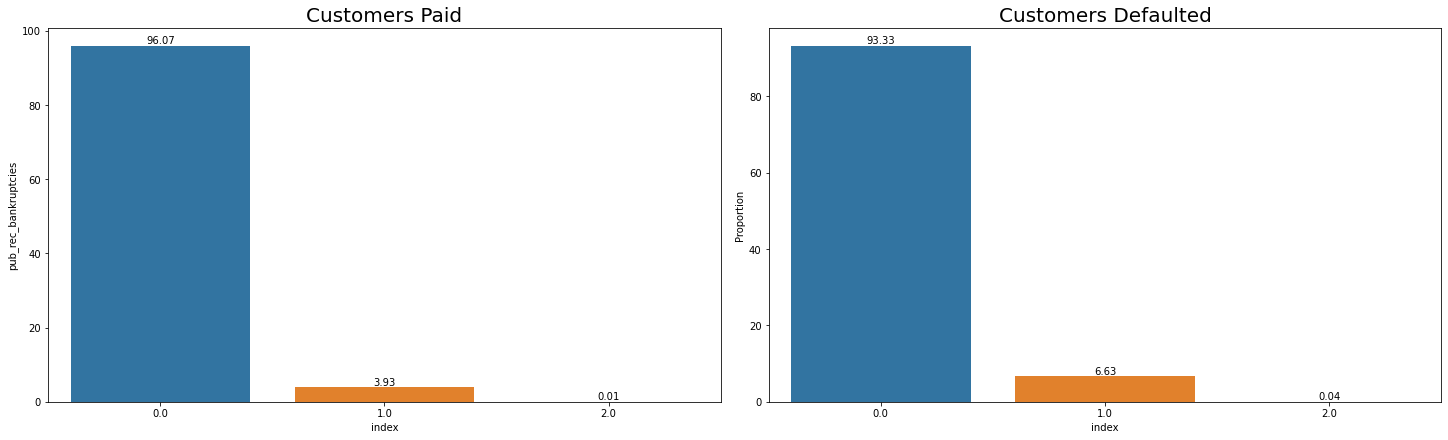

In [134]:
plot_vs_loan('pub_rec_bankruptcies')

**Observation**:

The percentage of Charged Off loans is markedly higher when the Customer has a prior record of bankruptcy.

### revol_util vs Loan status

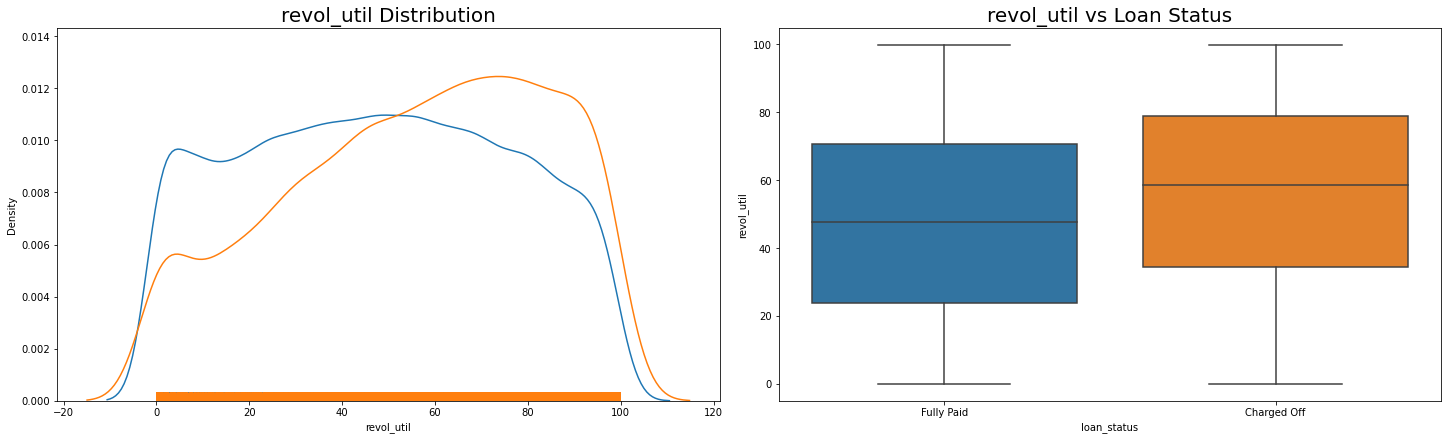

In [135]:
bi_plots('revol_util')

**Observation** :

### DTI vs Loan status

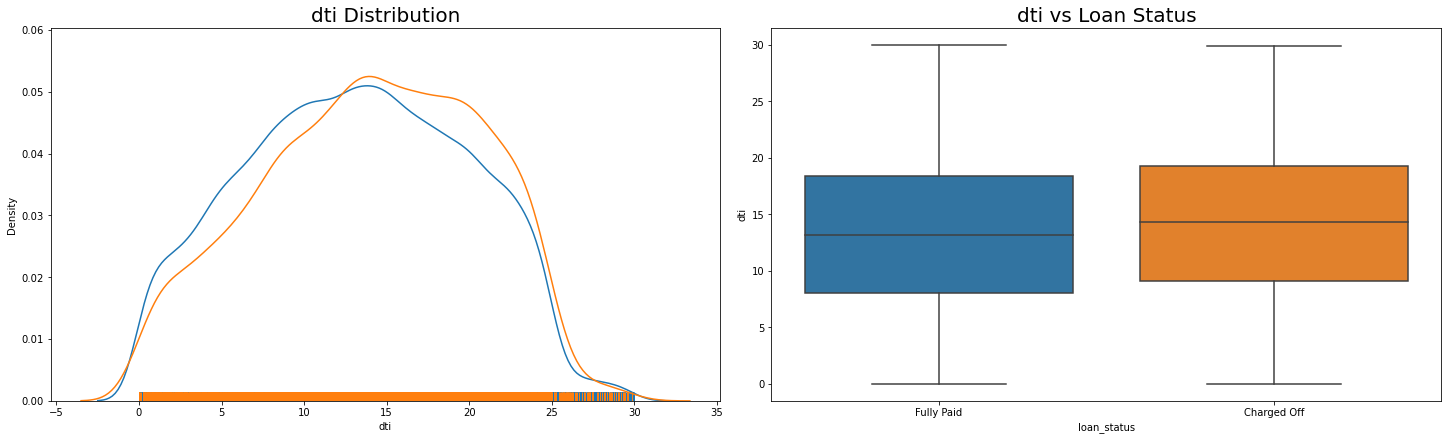

In [136]:
bi_plots('dti')

**Observation**:
    
No such major difference for DTI. 

The only insight we can derive is higher the DTI , higher the chances of charge off but its understandable.

### Issue Month vs Loan Status

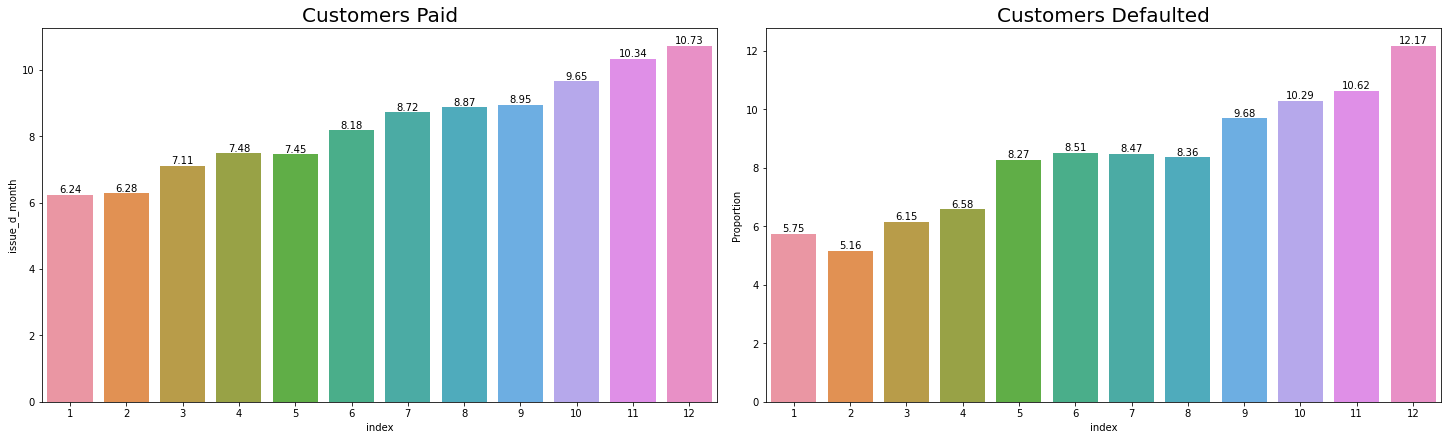

In [137]:
plot_vs_loan('issue_d_month')

**Observation**:

The Charged Off customers tend to have taken loan in the last quarter more than the rest of the months.<br>
   


# Outcomes from Segmented Univariate Analysis:

**Loan Amount** - The percentage for defaulted customers increases as the loan amount increases beyond 12k Limit. <br>
**Interest rates** - the risk increases the rate of interest imposed on the loan also increases.<br>
**Home ownership** - Customers who defaulted has much higher distribution in Rent as compared to customers who paid the loan on time.<br>
**Grades** - Default rate increases as the Grade Decreases.The Default rate increases for D,E,F and G grades<br>
**Purpose** - Small business tend to default more,followed by debt consolidation<br>
**Term** - The Defaulted Customers tend to take loan for 60 terms as compared to 36 months.<br>
**Issue date** - The Charged Off customers tend to have taken loan in the last quarter more than the rest of the months

### Additional Information received after performing segmented univariate analysis

**pub_rec** - Having even 1 derogatory record increases the chances of Charge Off significantly.<br>

**pub_rec_bankruptcies** - The percentage of Charged Off loans is markedly higher when the Customer has a prior record of bankruptcy.

## Bivariate Analysis

### Annual Income vs Loan Amount

In [138]:
#Checking the correlation for the two variables
loan_data[['annual_inc','loan_amnt']].corr()

annual_inc  loan_amnt
annual_inc        1.00       0.39
loan_amnt         0.39       1.00

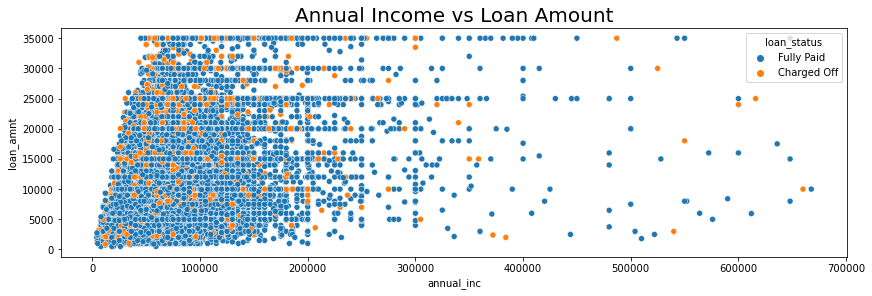

In [139]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=loan_data,x='annual_inc',y='loan_amnt',hue='loan_status')
plt.title("Annual Income vs Loan Amount", fontdict = {'fontsize' : 20})
#sns.scatterplot(data=loan_data[loan_data['loan_status']=='Charged Off'],x='loan_amnt',y='annual_inc',ax=ax[1],label='Defaults')
plt.show()

**We can have a loan amount to Annual income ratio to understand the deep relationshio if it exists**.

In [140]:
#Creating Derived column for the ration of loan amount and annual income
loan_data['Loan_income_ratio']=loan_data['loan_amnt']/loan_data['annual_inc']

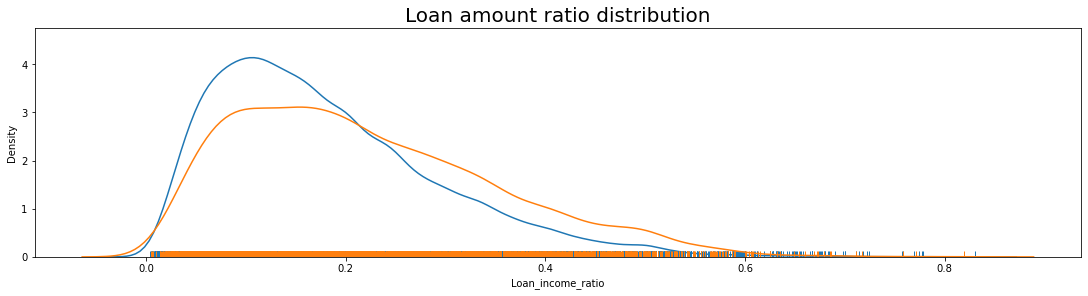

In [141]:
#Plotting the ratio
sns.distplot(loan_data[(loan_data['loan_status']=='Fully Paid') ]['Loan_income_ratio'], hist=False, rug=True)
sns.distplot(loan_data[(loan_data['loan_status']=='Charged Off')]['Loan_income_ratio'], hist=False, rug=True)
plt.title("Loan amount ratio distribution", fontdict = {'fontsize' : 20})
plt.show()


There's a point where both ration overlap and charged off customers have more density. Let's assume its 22.5%.

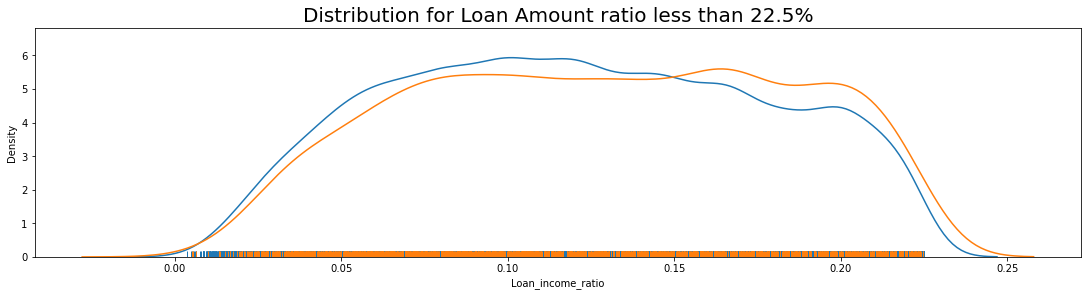

In [142]:
sns.distplot(loan_data[(loan_data['loan_status']=='Fully Paid') & (loan_data['Loan_income_ratio']<0.225)]['Loan_income_ratio'], hist=False, rug=True)
sns.distplot(loan_data[(loan_data['loan_status']=='Charged Off') & (loan_data['Loan_income_ratio']<0.225)]['Loan_income_ratio'], hist=False, rug=True)
plt.title("Distribution for Loan Amount ratio less than 22.5%", fontdict = {'fontsize' : 20})
plt.show()


In [193]:
##We can check the correlation as well for ratio and dti just to see that our derived variable is useful
loan_data[['Loan_income_ratio','dti']].corr()

Loan_income_ratio  dti
Loan_income_ratio               1.00 0.14
dti                             0.14 1.00

**Observation**  :

The cut off ratio can be around 24-25% for default customers.<br>
Anything above 25% loan-to-income ratio can be deciding factors for the company.


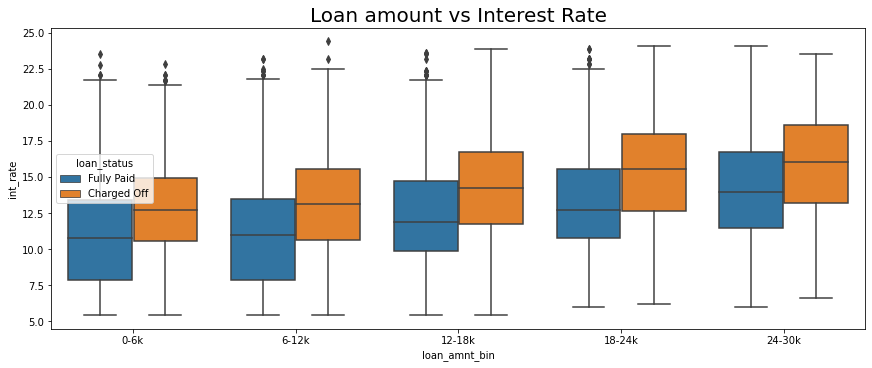

In [143]:
plt.figure(figsize=(12,5))
sns.boxplot(data=loan_data, x='loan_amnt_bin', y='int_rate',hue='loan_status')
plt.title("Loan amount vs Interest Rate", fontdict = {'fontsize' : 20})
plt.show()

### Annual Income vs Interest Rate

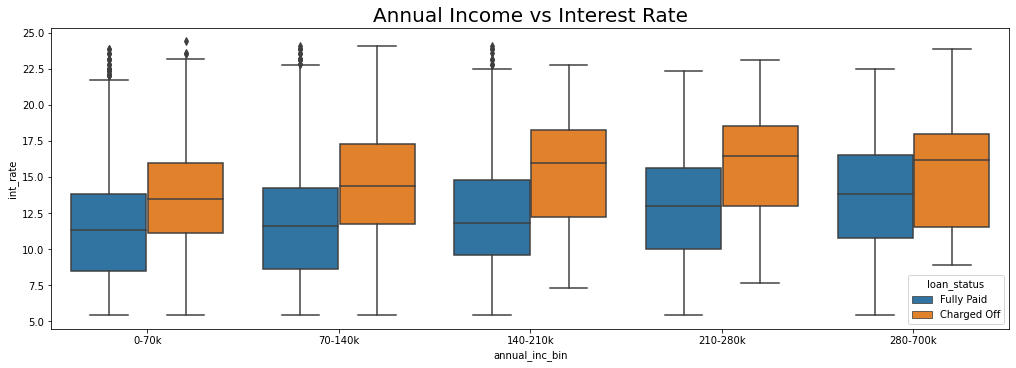

In [144]:
plt.figure(figsize=(14,5))
sns.boxplot(data=loan_data, x='annual_inc_bin', y='int_rate',hue='loan_status')
plt.title("Annual Income vs Interest Rate", fontdict = {'fontsize' : 20})
plt.show()

**Observation** :

The charged off rate is higher for higher interest rates irrespective the annaul income bucket.

###  Annual income vs Issue Year

In [145]:
loan_data.groupby('issue_d_year').annual_inc.mean()

issue_d_year
2007   72071.73
2008   63866.77
2009   65976.78
2010   66866.65
2011   68734.95
Name: annual_inc, dtype: float64

We can plot the annual income distribution for issue years to see the decline. 

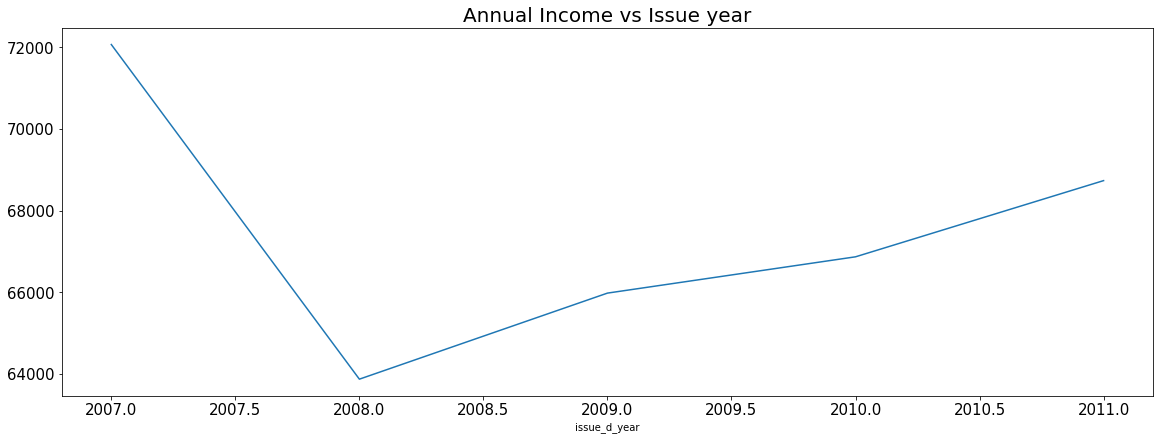

In [146]:
plt.figure(figsize=(16,6))
plt.title("Annual Income vs Issue year", fontdict = {'fontsize' : 20})
loan_data.groupby('issue_d_year')['annual_inc'].mean().plot(kind='line', fontsize=15)
plt.show()

**Observation** :  

The annual income took in dip in 2008 may be because of some crisis.

#### Googling it showed that there was a huge finanical crisis in 2008:

   - The financial crisis of 2008, or Global Financial Crisis (GFC), was a severe worldwide economic crisis that occurred in the late 2000s
    
    
**"The seeds of the financial crisis were planted during years of rock-bottom interest rates and loose lending standards that fueled a housing price bubble in the U.S. and elsewhere. It began, as usual, with good intentions."**

We can look at the interest rates for those years .

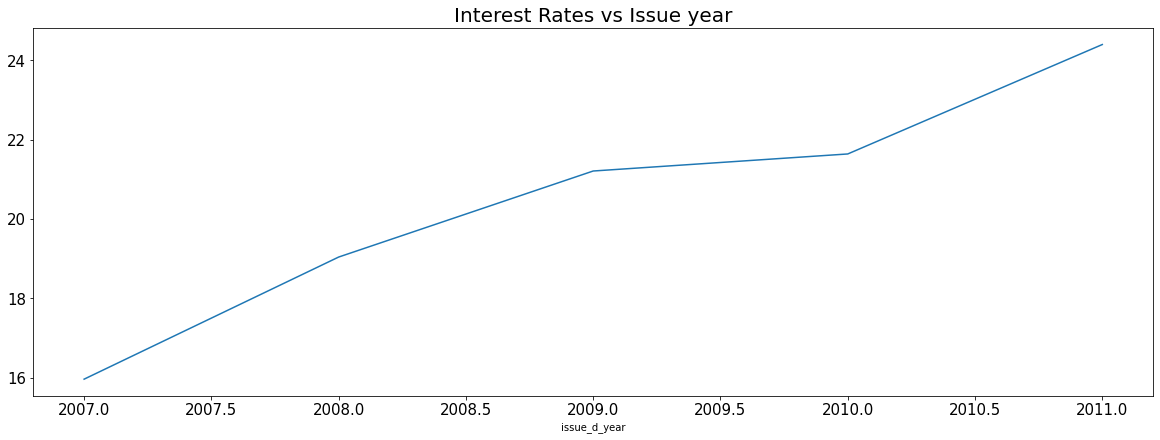

In [147]:
plt.figure(figsize=(16,6))
plt.title("Interest Rates vs Issue year", fontdict = {'fontsize' : 20})
loan_data.groupby('issue_d_year')['int_rate'].max().plot(kind='line', fontsize=15)
plt.show()

**Observation**:
    
The interest rate grew rapidly after that crisis.

### Employement Length

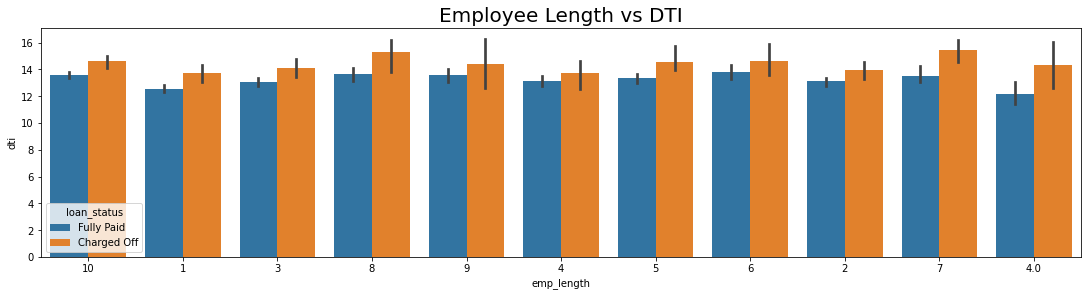

In [148]:
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=loan_data, estimator=np.median)
plt.title("Employee Length vs DTI", fontdict = {'fontsize' : 20})
plt.show()

**Observation** :
    
The charge off is consistent among the employement years with respect to higher DTI.

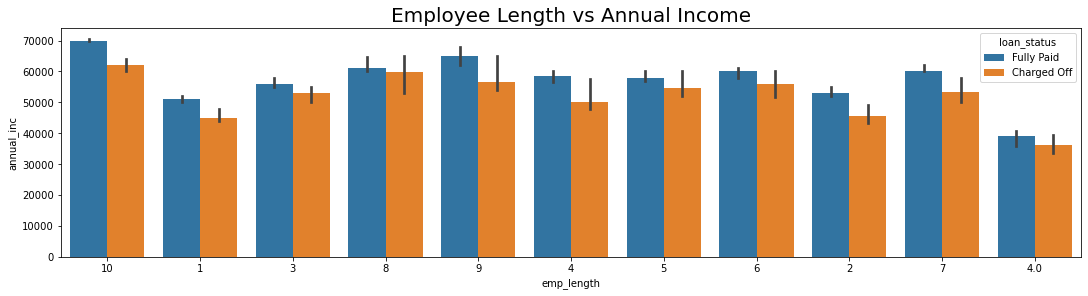

In [149]:
sns.barplot(x='emp_length', y='annual_inc', hue='loan_status', data=loan_data, estimator=np.median)
plt.title("Employee Length vs Annual Income", fontdict = {'fontsize' : 20})
plt.show()

**Observation**

Customers with high income with respect to the employement length are less likely to charge off.

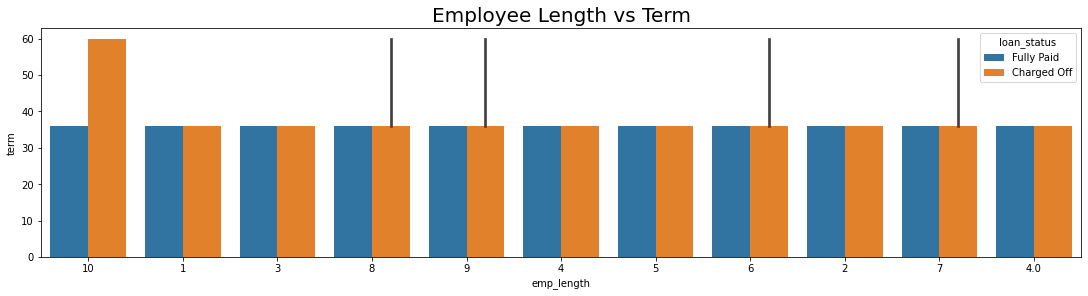

In [150]:
sns.barplot(x='emp_length', y='term', hue='loan_status', data=loan_data, estimator=np.median)
plt.title("Employee Length vs Term", fontdict = {'fontsize' : 20})
plt.show()

**Observation** :
    
The charge off is more if the experienced customers takes loan for 60 months as compared to 36 months.

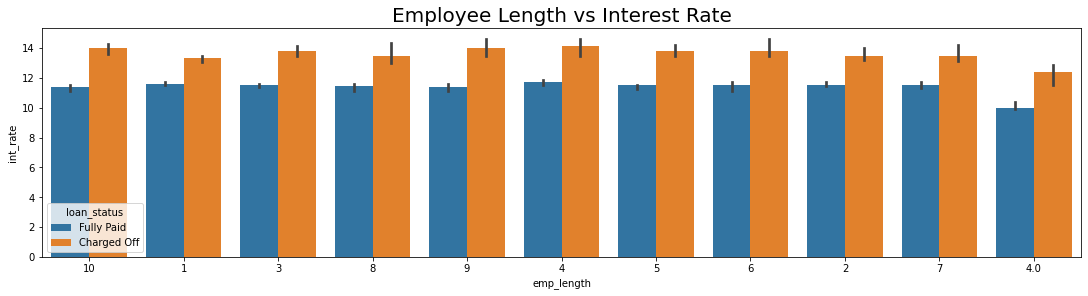

In [151]:
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=loan_data, estimator=np.median)
plt.title("Employee Length vs Interest Rate", fontdict = {'fontsize' : 20})
plt.show()

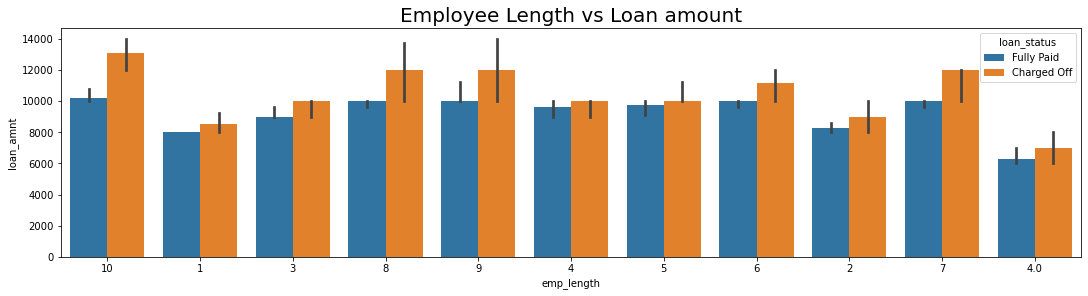

In [152]:
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan_data, estimator=np.median)
plt.title("Employee Length vs Loan amount", fontdict = {'fontsize' : 20})
plt.show()

### Grade and Sub-grade vs Term

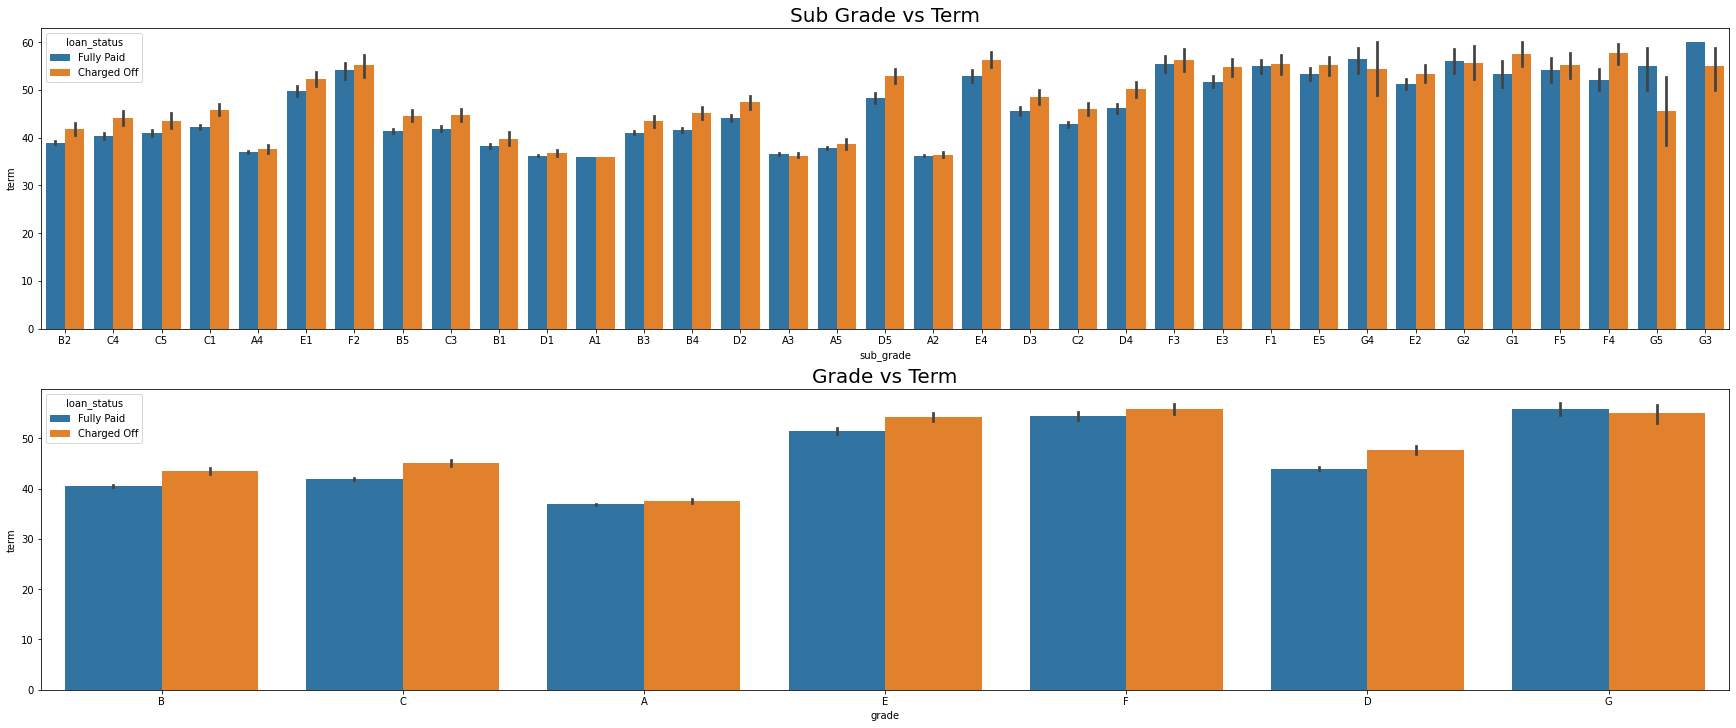

In [153]:
plt.figure(figsize=(24,10))
plt.subplot(211)
sns.barplot(x='sub_grade', y='term',hue='loan_status',data=loan_data)
plt.title("Sub Grade vs Term", fontdict = {'fontsize' : 20})
plt.subplot(212)
sns.barplot(x='grade', y='term',hue='loan_status',data=loan_data)
plt.title("Grade vs Term", fontdict = {'fontsize' : 20})
plt.show()

**Observation**:
    
The Charged off increases when the customers with lower grades take loans for term of 60 months.

### Grade and Sub-grade vs Interest Rate

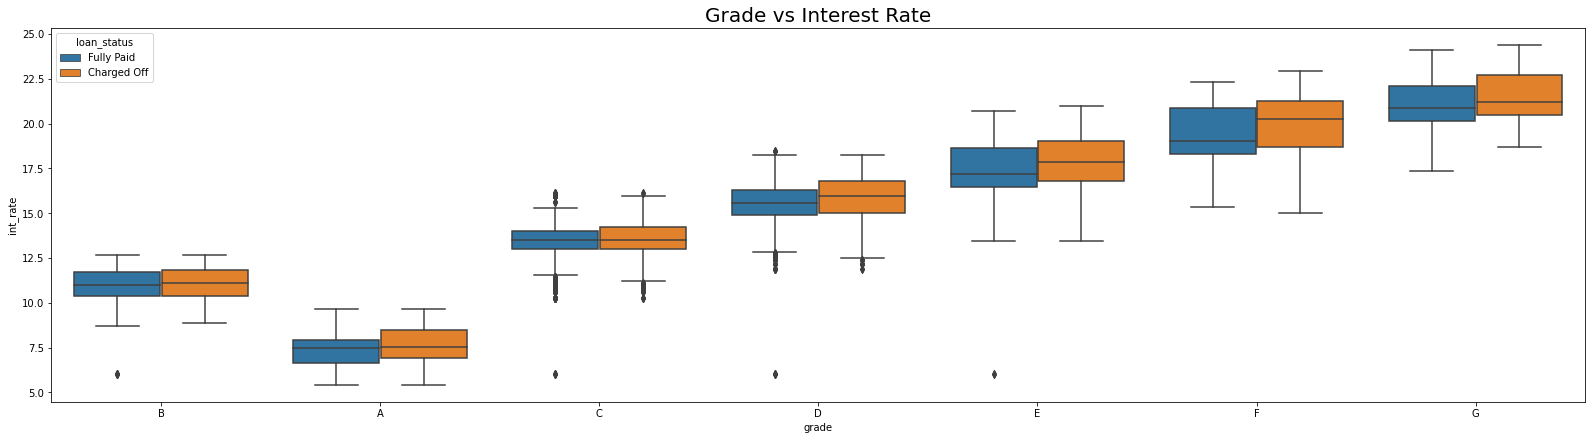

In [154]:
plt.figure(figsize=(22,6))
plt.title('Grade vs Interest Rate', fontdict = {'fontsize' : 20})
sns.boxplot(x='grade', y=loan_data.int_rate, order = loan_data.grade.value_counts().index,hue='loan_status', data=loan_data)
plt.show()

Only using **D E F** and **G** for the deep dive into **sub grades**.

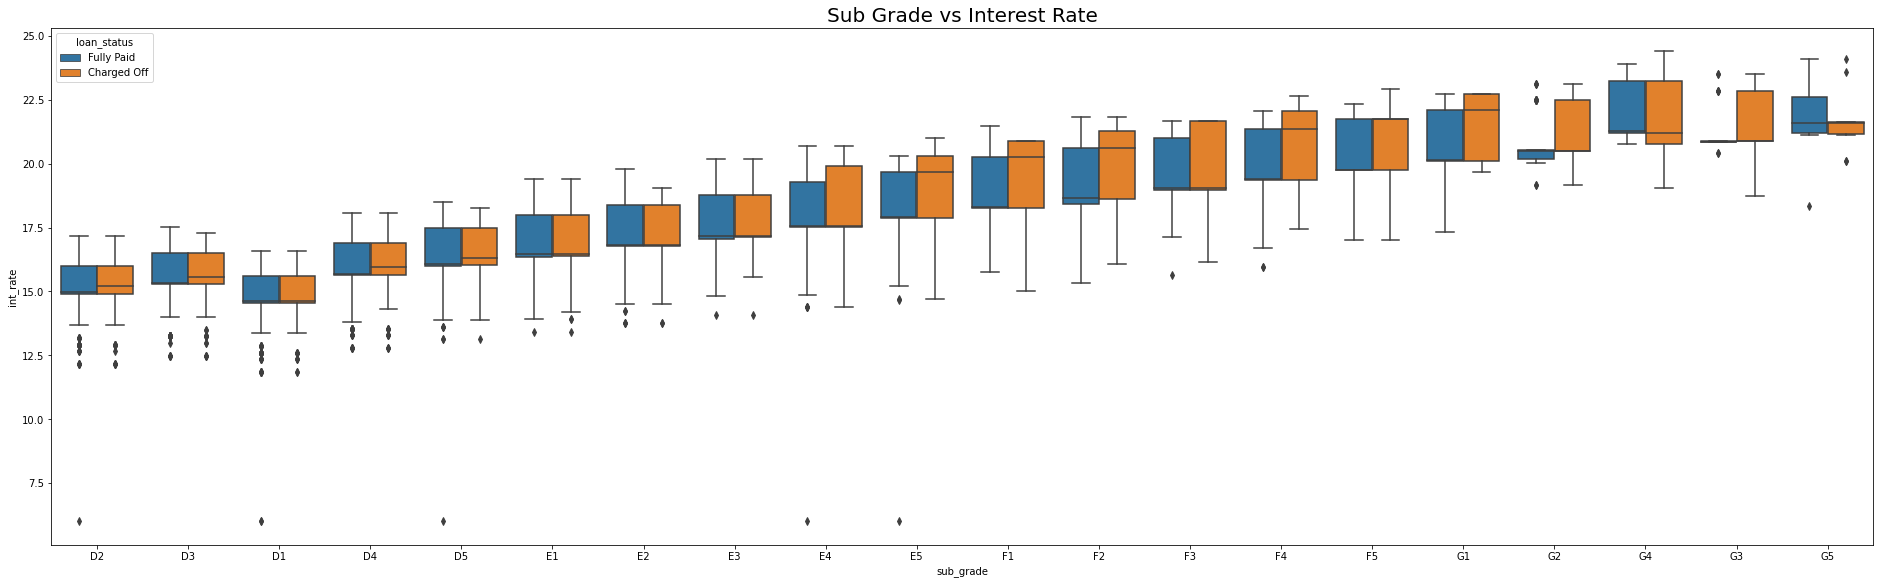

In [155]:
plt.figure(figsize=(26,8))
plt.title('Sub Grade vs Interest Rate', fontdict = {'fontsize' : 20})
sns.boxplot(x='sub_grade', y=loan_data['int_rate'],  order = loan_data[loan_data['grade'].isin(['D','E','F','G'])].sub_grade.value_counts().index,hue='loan_status',data=loan_data[loan_data['grade'].isin(['D','E','F','G'])])
plt.show()

**Observation** :

We could summarize that the higher the interest rate for lower grades , the higher the chance of charge off.

### Grade and Sub-grade vs Loan amount

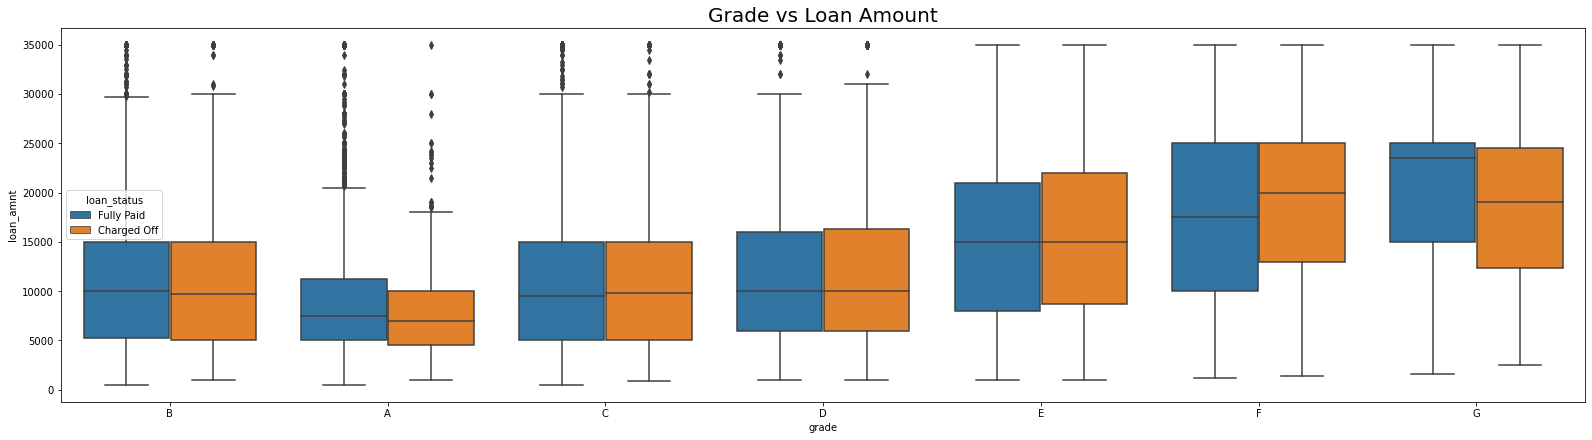

In [156]:
plt.figure(figsize=(22,6))
plt.title('Grade vs Loan Amount', fontdict = {'fontsize' : 20})
sns.boxplot(x='grade', y=loan_data.loan_amnt, order = loan_data.grade.value_counts().index,hue='loan_status', data=loan_data)
plt.show()

**Observation**:
    
No such significant change in the numbers for Fully paid and Charged off Customers.

### Home ownership

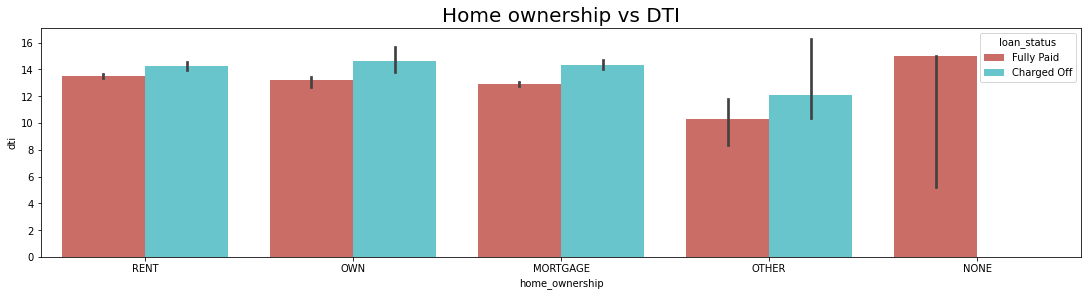

In [157]:
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=loan_data, estimator=np.median,palette = 'hls')
plt.title('Home ownership vs DTI', fontdict = {'fontsize' : 20})
plt.show()

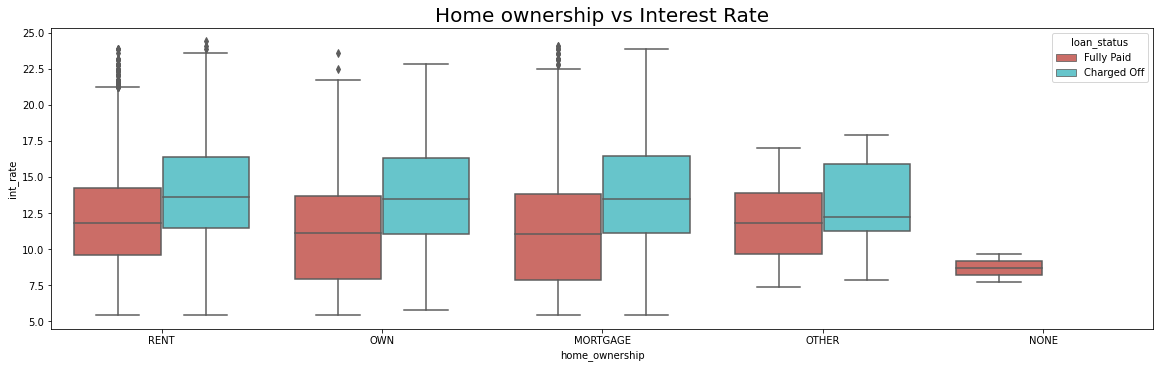

In [158]:
plt.figure(figsize=(16,5))
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan_data,palette = 'hls')
plt.title('Home ownership vs Interest Rate', fontdict = {'fontsize' : 20})
plt.show()

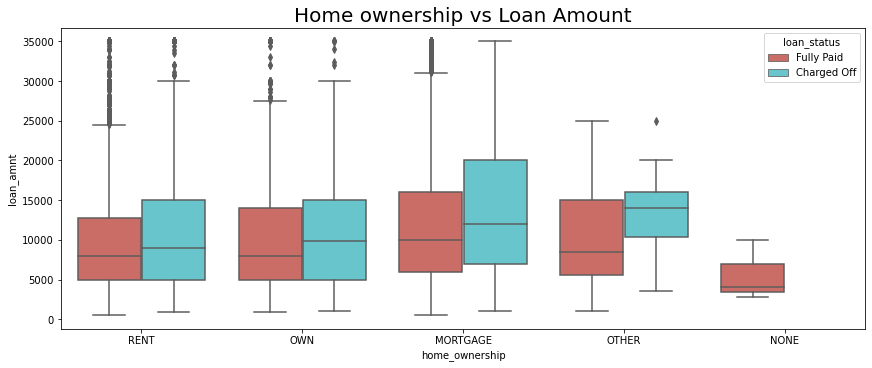

In [159]:
plt.figure(figsize=(12,5))
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan_data,palette = 'hls')
plt.title('Home ownership vs Loan Amount', fontdict = {'fontsize' : 20})
plt.show()

**Observation**:
    
Club can investigate before lending higher loan to customers who take loan for Mortgage as they are more likely to charge off.

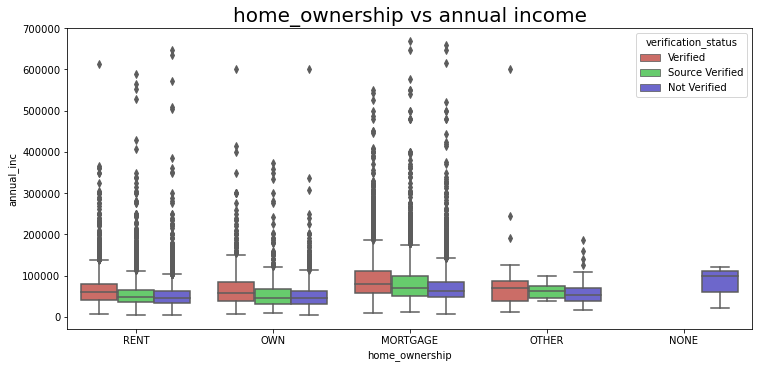

In [160]:

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_data.annual_inc, data=loan_data,hue='verification_status',palette = 'hls')
plt.title('home_ownership vs annual income', fontdict = {'fontsize' : 20})
plt.show()


**Observations**:<br>
- The home ownership status for mortgage has higher income.
- The income source was verfied for most of the customer's who had higher annual incomes.

### delinq_2yrs

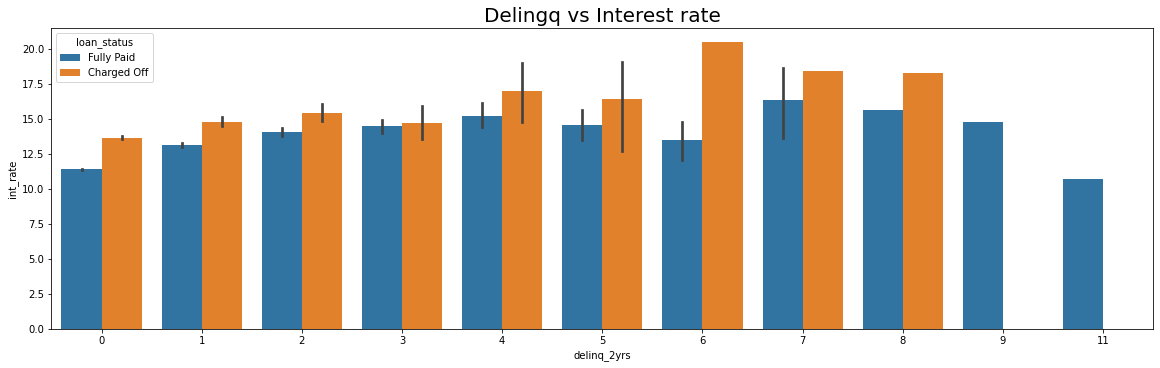

In [161]:
plt.figure(figsize=(16,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=loan_data, estimator=np.mean)
plt.title('Delingq vs Interest rate', fontdict = {'fontsize' : 20})
plt.show()

**Observation** 

Interest rate often increases with the number of deliquency of the Customer.

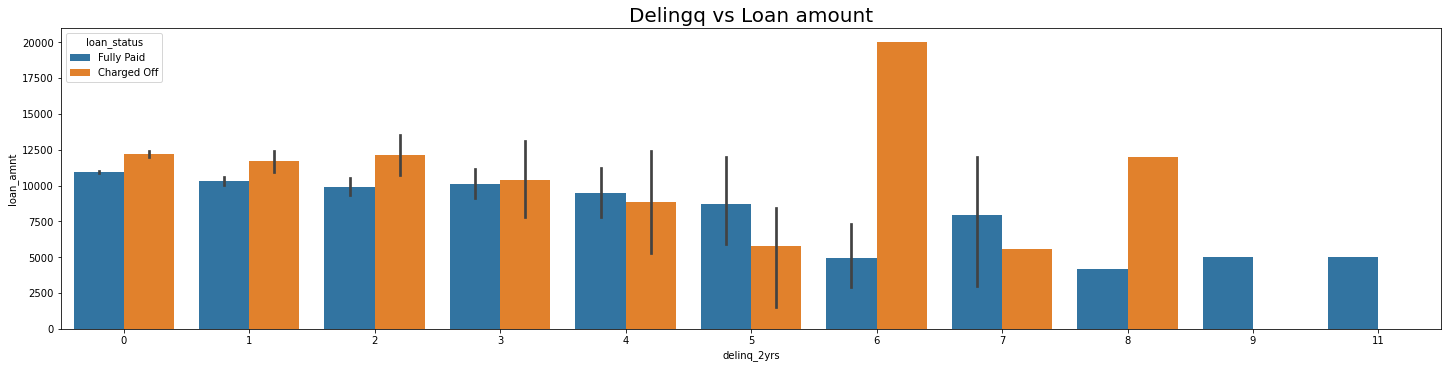

In [162]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='loan_status',data=loan_data, estimator=np.mean)
plt.title('Delingq vs Loan amount', fontdict = {'fontsize' : 20})
plt.show()

**Observation**


We can see default customers having loan amounts above 12k on average for people having more than 2 delinquencies.

### Purpose

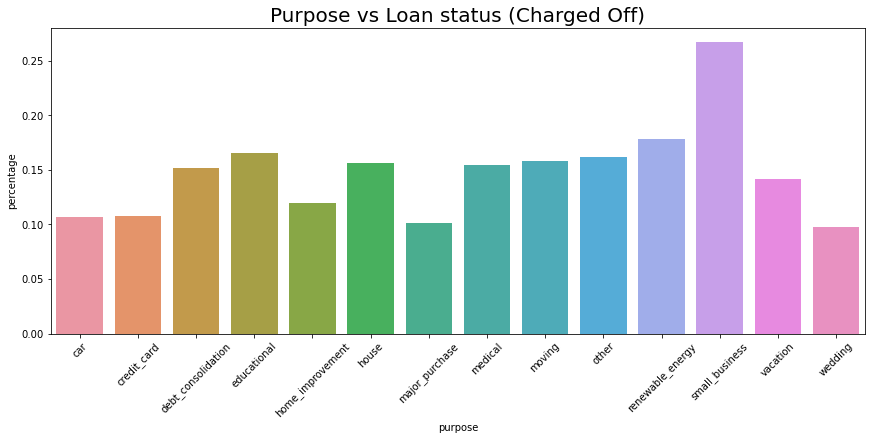

In [163]:
df = loan_data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,6))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=45)
plt.title('Purpose vs Loan status (Charged Off)' ,fontdict = {'fontsize' : 20})
plt.show()

**Observations**:
    
    
Charged-off are higher for small_business comparitively,followed by renewable energy and educational purposes.

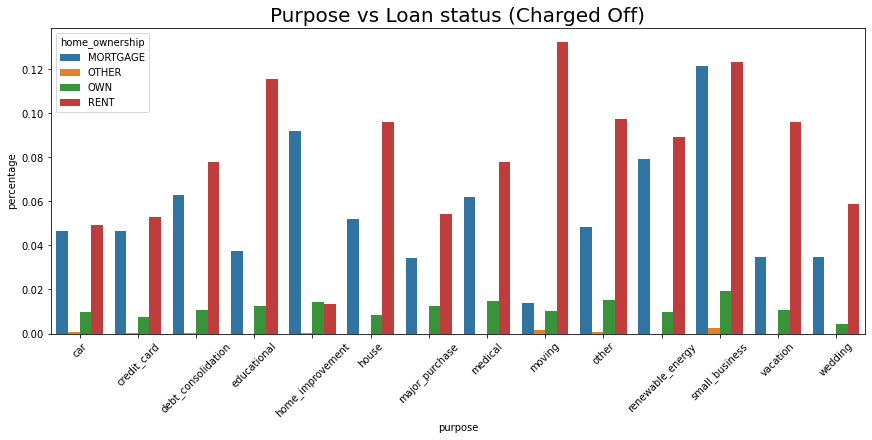

In [164]:
df = loan_data.groupby(['purpose','home_ownership' ,'loan_status'], as_index=False)['loan_amnt'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,6))
sns.barplot(x='purpose', y='percentage', data=df,hue='home_ownership')
plt.xticks(rotation=45)
plt.title('Purpose vs Loan status (Charged Off)' ,fontdict = {'fontsize' : 20})
plt.show()

**Observation**:
    
Customers living on rent and mortgage add more information to above insights. 

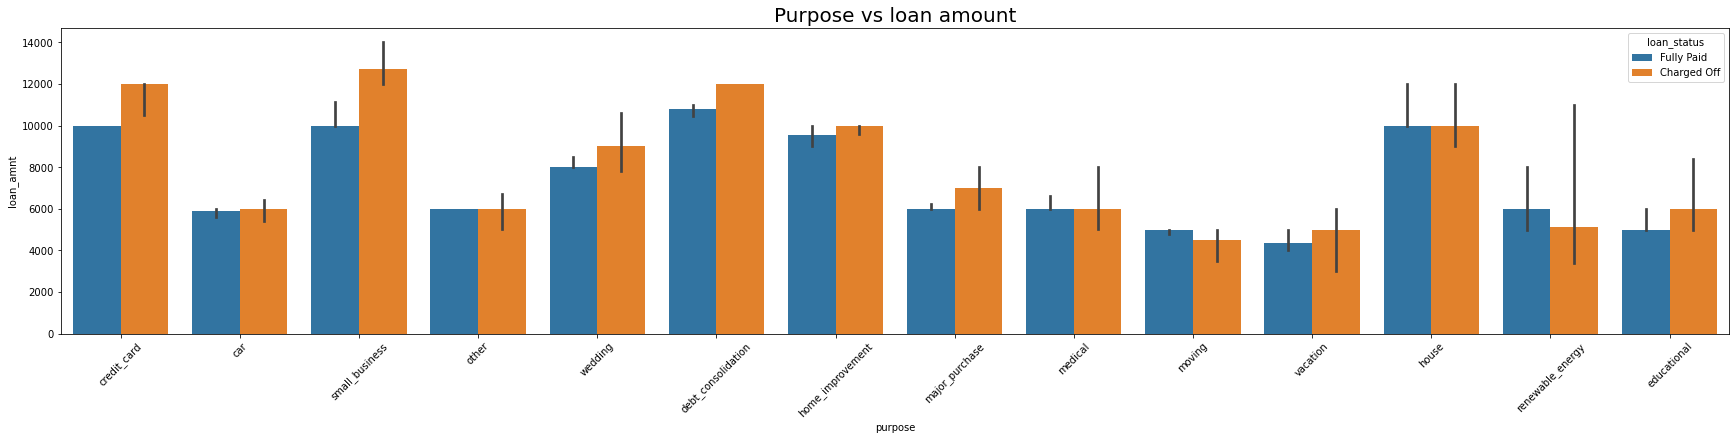

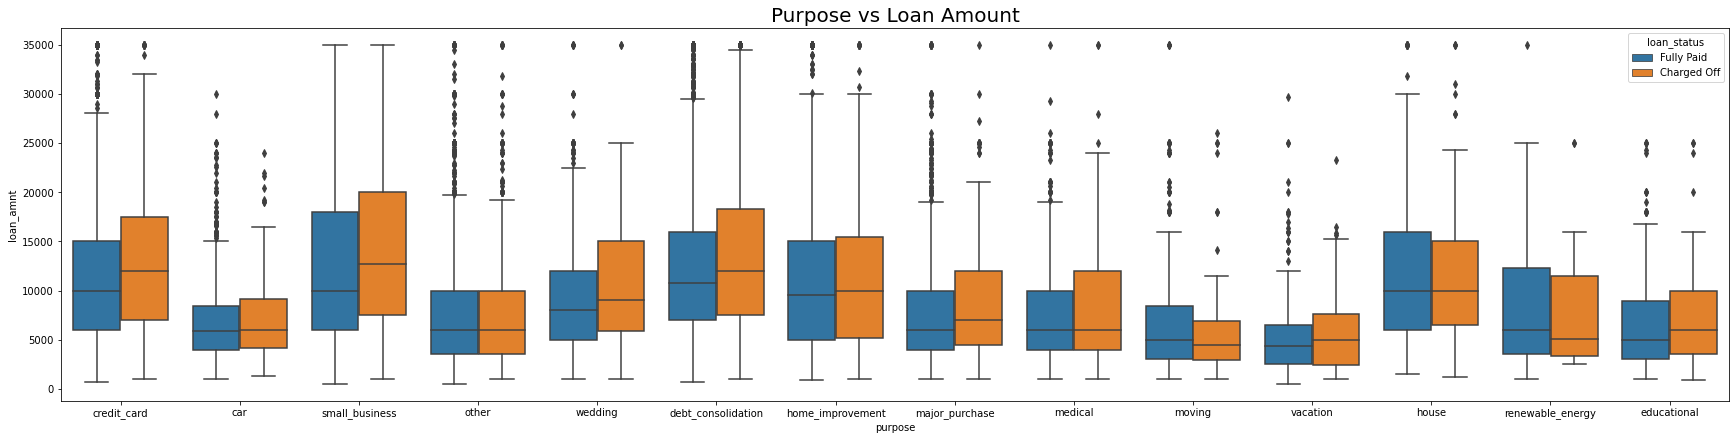

In [165]:
df = loan_data.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()


plt.figure(figsize=(24,6))
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_data, estimator=np.median)
plt.title('Purpose vs loan amount', fontdict = {'fontsize' : 20})
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(24,6))
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_data)
plt.title("Purpose vs Loan Amount", fontdict = {'fontsize' : 20})
plt.show()

**Observations**:

Small Business has more defaults Customers when the loan amount is also high.

### Purpose vs Interest Rate

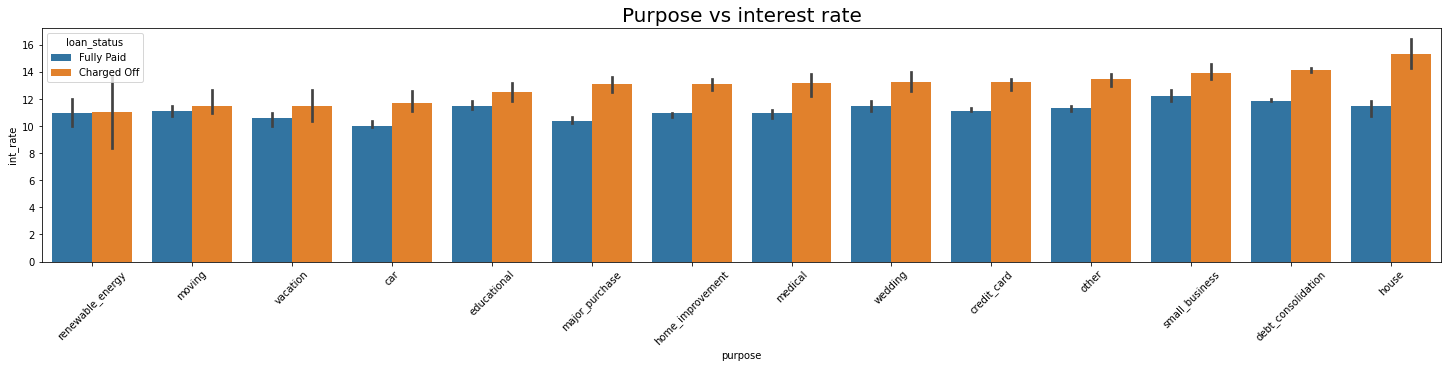

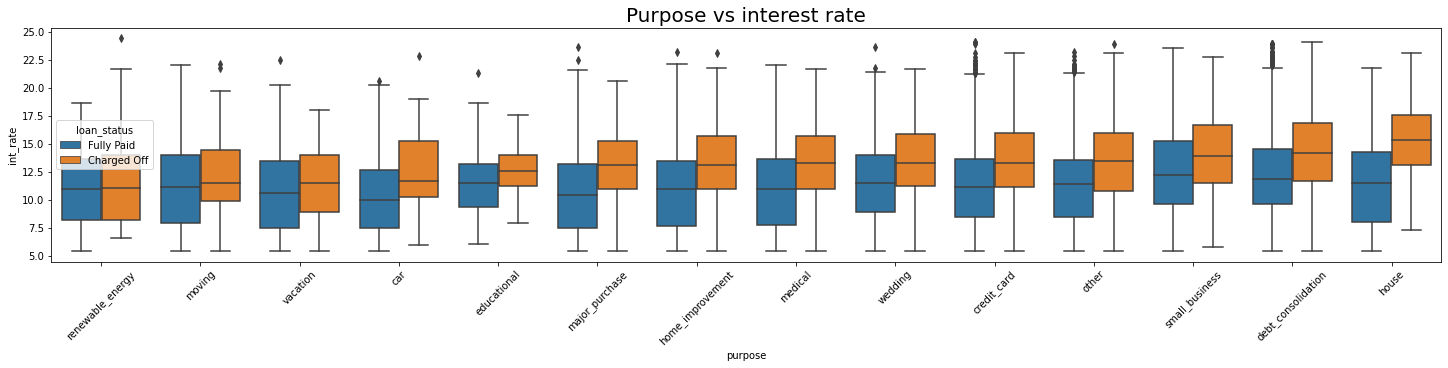

In [166]:
df = loan_data.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.figure(figsize=(20,5))
plt.title('Purpose vs interest rate', fontdict = {'fontsize' : 20})
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= loan_data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(20,5))
plt.title('Purpose vs interest rate', fontdict = {'fontsize' : 20})
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= loan_data, order = purpose_ord)
plt.xticks(rotation=45)
plt.show()

**Observations**:

Home loans with high interest rates are mostly defaulted. 

Even small business and debt consolidation has similar observation.

### Verification Status

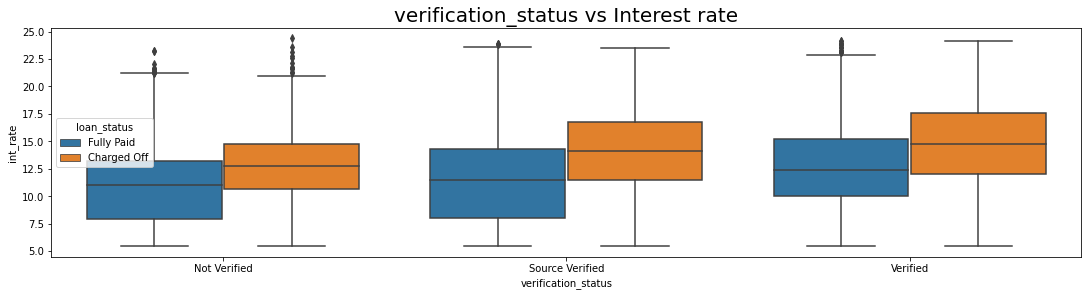

In [167]:
plt.title('verification_status vs Interest rate', fontdict = {'fontsize' : 20})
verification_status_ord = loan_data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_data.int_rate, order = verification_status_ord, data=loan_data,hue='loan_status')
plt.show()

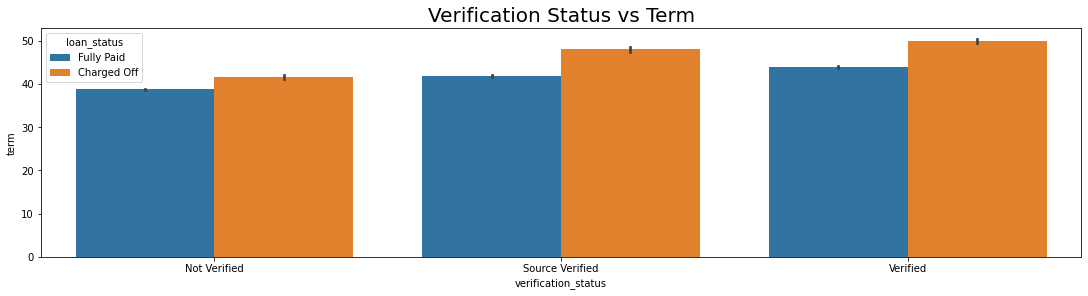

In [168]:
sns.barplot(x='verification_status', y='term',hue='loan_status',data=loan_data,order = verification_status_ord)
plt.title("Verification Status vs Term", fontdict = {'fontsize' : 20})
plt.show()

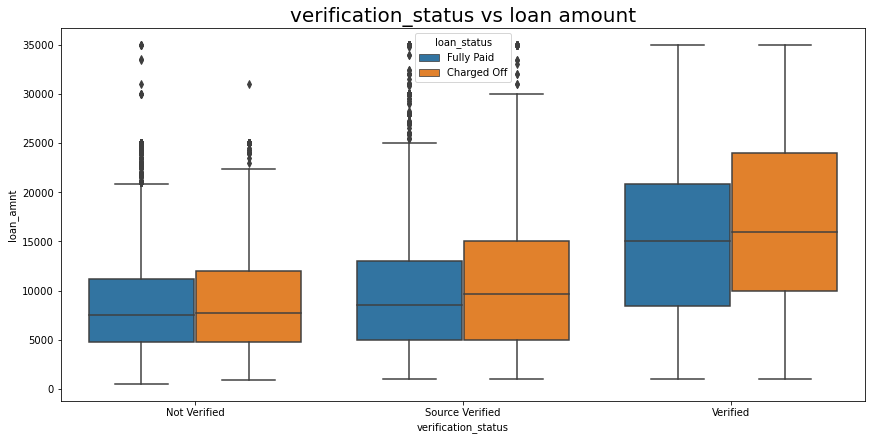

In [169]:
plt.figure(figsize=(12,6))
plt.title('verification_status vs loan amount', fontdict = {'fontsize' : 20})
verification_status_ord = loan_data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_data.loan_amnt, order = verification_status_ord, data=loan_data,hue='loan_status')
plt.show()

C:\Users\gautam.a.bhutani\Anaconda3\envs\tf\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self.fig.tight_layout(*args, **kwargs)


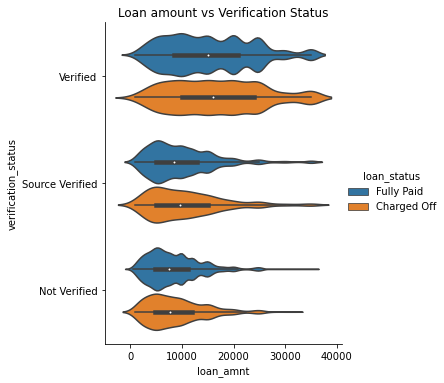

In [170]:
sns.catplot(x="loan_amnt", y="verification_status", data=loan_data,hue='loan_status',kind='violin')
plt.title("Loan amount vs Verification Status")
plt.show()

**Observation**: 
    
Verified Customers will given much higher loan amount at higher interest rates but they were charged off more than the non-verified customers.

In [171]:
loan_data['verification_status'].value_counts()

Not Verified       16631
Verified           12176
Source Verified     9646
Name: verification_status, dtype: int64

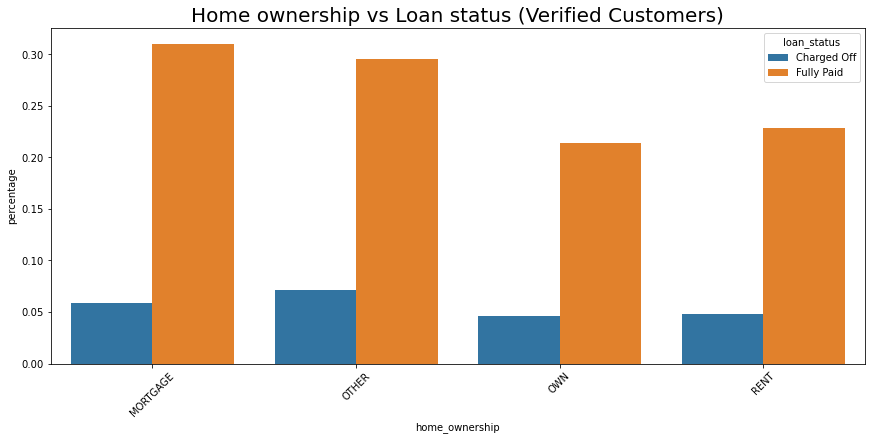

In [172]:
df = loan_data.groupby(['verification_status', 'home_ownership','loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
df = df[df.verification_status == 'Verified']
plt.figure(figsize=(12,6))
sns.barplot(x='home_ownership', y='percentage', data=df,hue='loan_status')
plt.xticks(rotation=45)
plt.title('Home ownership vs Loan status (Verified Customers)' ,fontdict = {'fontsize' : 20})
plt.show()

**Observation**:
    
We can summarize that Club can investigate more before lending loan to verified customers.

### Issue date

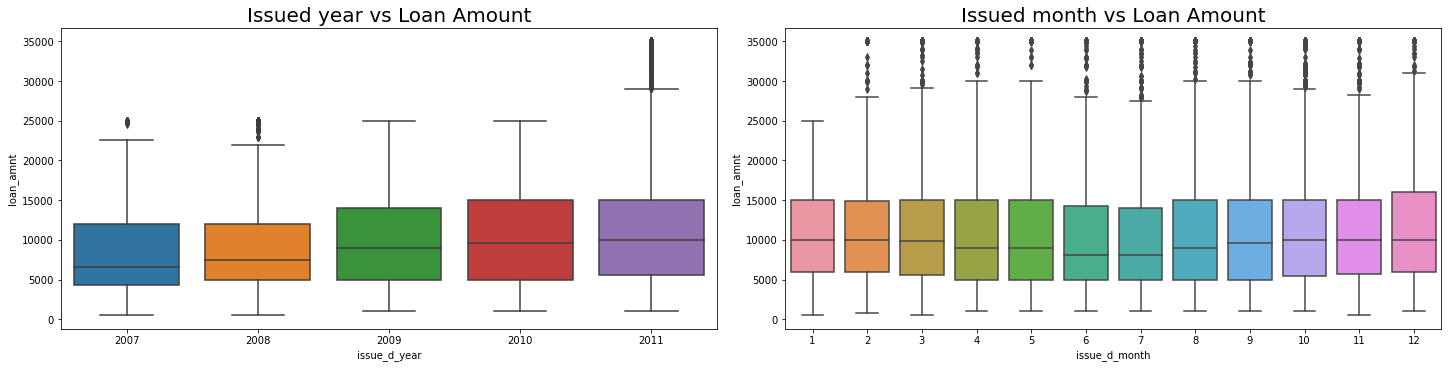

In [173]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan_data.issue_d_year, y=loan_data.loan_amnt, data=loan_data)
plt.title('Issued year vs Loan Amount', fontdict = {'fontsize' : 20})
plt.subplot(122)
sns.boxplot(x=loan_data.issue_d_month, y=loan_data.loan_amnt, data=loan_data)
plt.title('Issued month vs Loan Amount', fontdict = {'fontsize' : 20})
plt.show()

**Observations**:

The loan amount median for each year was mostly constant but the distribution spreads as the year increases.<br> 
Customers have taken different loan amounts in each year.<br>
Some of the Customers took higher loan amount in 2008 and 2011 which are ouliers.<br>
Customers took almost similar amounts in all the months except in December, Customers have taken higher amounts as distribution is slightly above median.

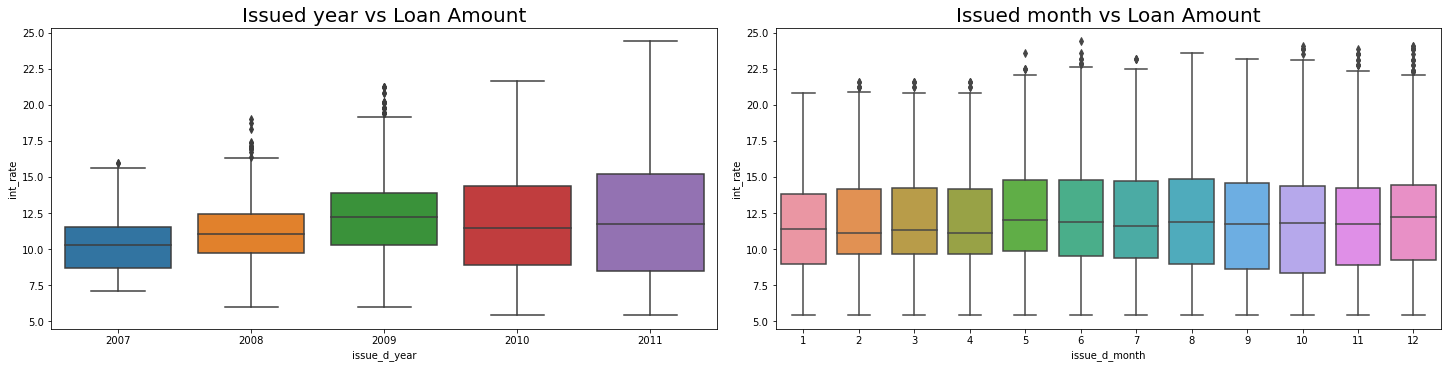

In [174]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan_data.issue_d_year, y=loan_data.int_rate, data=loan_data)
plt.title('Issued year vs Loan Amount', fontdict = {'fontsize' : 20})
plt.subplot(122)
sns.boxplot(x=loan_data.issue_d_month, y=loan_data.int_rate, data=loan_data)
plt.title('Issued month vs Loan Amount', fontdict = {'fontsize' : 20})
plt.show()

**Observation**:

The Interest rate median for each year slightly spreads as the year increases.<br> 
The interest rate also increases slightly by month as well.

### Term 

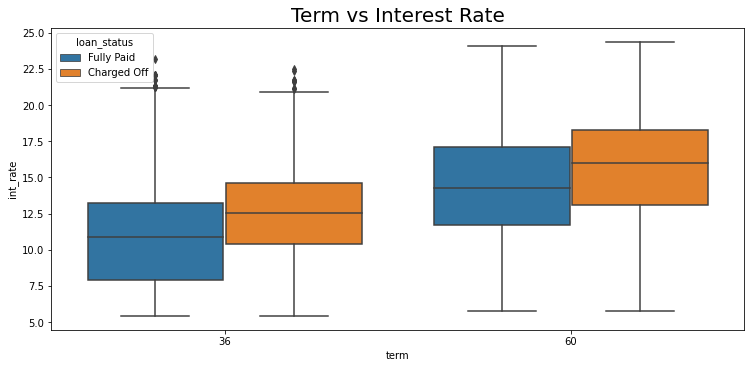

In [175]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_data.int_rate, data=loan_data,hue='loan_status')
plt.title('Term vs Interest Rate', fontdict = {'fontsize' : 20})
plt.show()

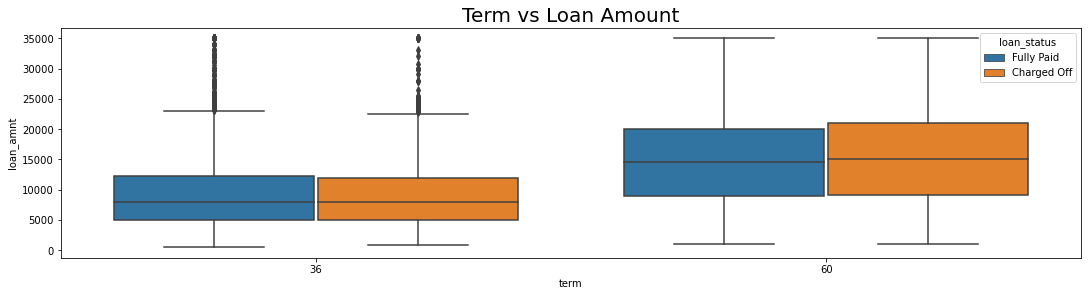

In [176]:
sns.boxplot(x='term', y='loan_amnt',hue='loan_status',data=loan_data)
plt.title('Term vs Loan Amount', fontdict = {'fontsize' : 20})
plt.show()

**Observation** :

The default rate increase with term of 60 months as compared to term of 36 months.

## pub_rec

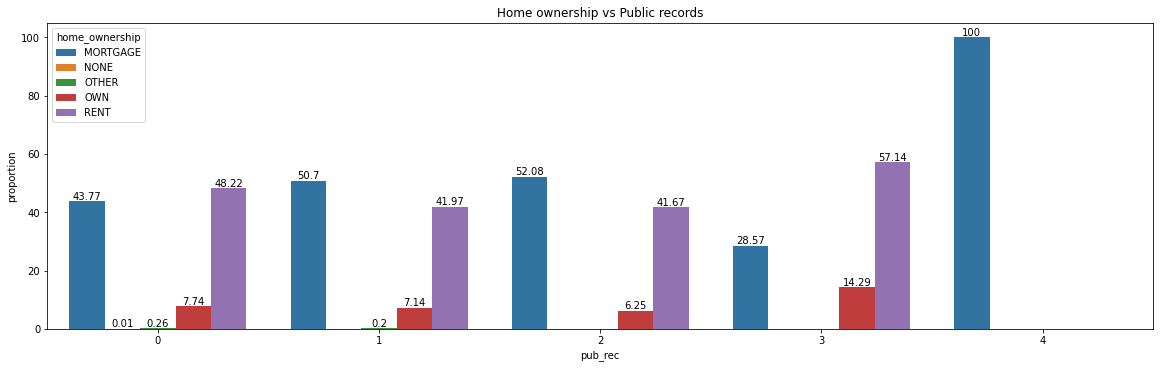

In [177]:
plt.figure(figsize=(16,5))
df = loan_data.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df['proportion'] = round(df.groupby('pub_rec').transform(lambda x: x/x.sum())*100,2)
ax = sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Home ownership vs Public records')
plt.show()

**Observations**: 

Customers with 4 public Derogatory records are high in **mortgage owned** home ownership. 

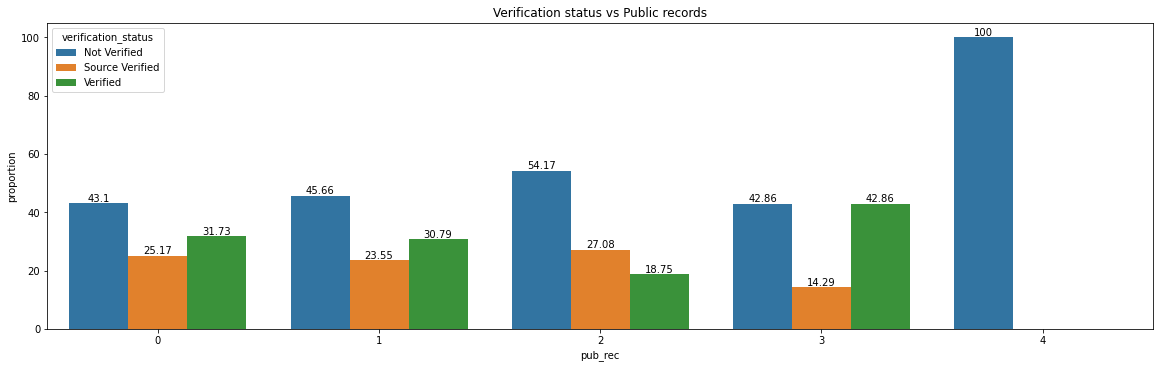

In [178]:
plt.figure(figsize=(16,5))
df = loan_data.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df['proportion'] = round(df.groupby('pub_rec').transform(lambda x: x/x.sum())*100,2)
ax = sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Verification status vs Public records')
plt.show()

**Observation**: 

Customers with 4 public Derogatory records are high in **Not verified** verification status.

## Outcomes from Bivariate Analysis

**Loan_income_ratio**
   - Anything above 25% loan-to-income ratio can be deciding factors for the company.<br>

**annual income**
   - The annual income took in dip in 2008 may be because of financial crisis.<br>

**Interest rate**
   - The interest rate grew rapidly after that crisis.<br>

**verification status**
   - Verified Customers will given much higher loan amount at higher interest rates but they were charged off more than the non-verified customers.<br>

**emp length**
   - The charge off is more if the experienced customers takes loan for 60 months as compared to 36 months.<br>

**grade**
   - The Charged off increases when the customers with lower grades take loans for term of 60 months.<br>

**purpose**
   - Charged-off are higher for small_business comparitively,followed by renewable energy and educational purposes.<br>

**home ownership**
   - Club can investigate before lending higher loan to customers who take loan for Mortgage as they are more likely to charge off.


## Multivariate Analysis

In [182]:
loan_data.head(1)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000          4975.00    36     10.65   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2         10           RENT    24000.00   

  verification_status    issue_d loan_status      purpose     title zip_code  \
0            Verified 2011-12-01  Fully Paid  credit_card  Computer    860xx   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ 27.65            0       1985-01-01               1         3   

   pub_rec  revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  \
0        0      13648       83.70          9       0.00           0.00   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0      5863.16          5833.84          5000.00         863.16   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00   2015-01-01   

   last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  issue_d_year  \
0              171         2016-05-01                  0.00          2011   

   issue_d_month  earliest_cr_line_year  earliest_cr_line_month loan_amnt_bin  \
0             12                   1985                       1          0-6k   

  annual_inc_bin  Loan_income_ratio  
0          0-70k               0.21

In [183]:
#Creating a dataframe for the correlation values of all numerical columns
df = loan_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc','dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
        'pub_rec_bankruptcies']].corr()

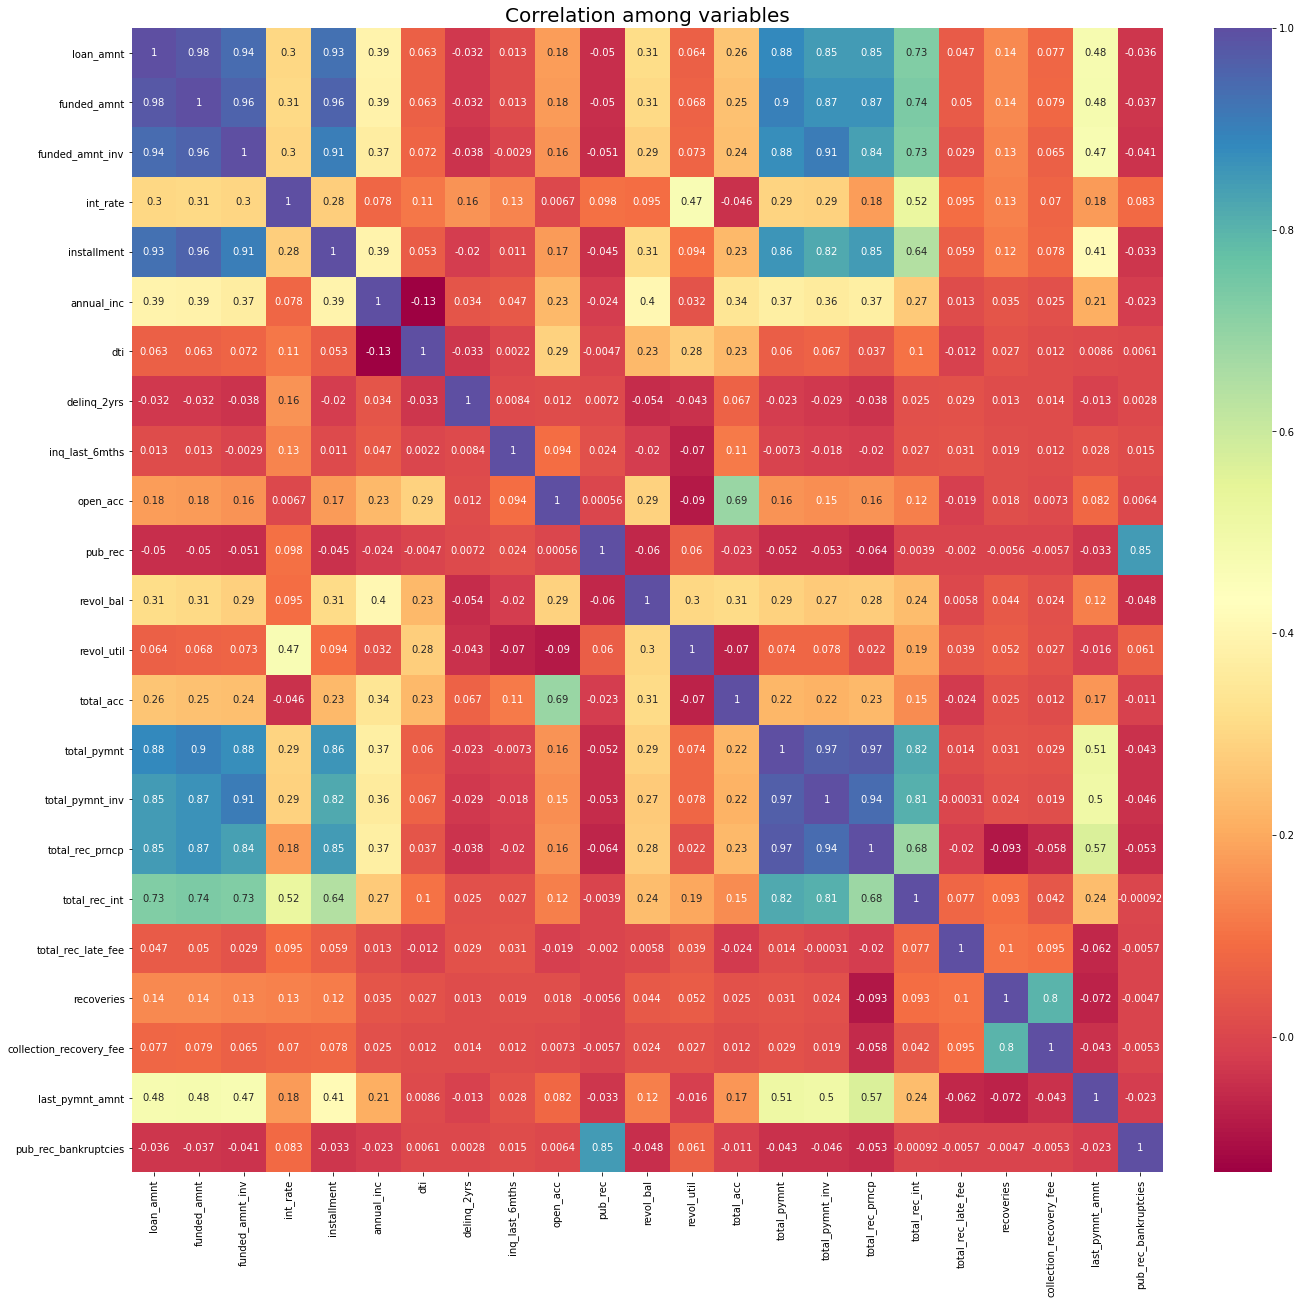

In [184]:
#plotting heat map
plt.figure(figsize=(18,18))
ax = sns.heatmap(df, annot = True, cmap='Spectral')
plt.title("Correlation among variables", fontdict = {'fontsize' : 20})
plt.show()

**Observation**:
    
We can many variables are correlated to each other and can be removed before modelling.


C:\Users\gautam.a.bhutani\Anaconda3\envs\tf\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self.fig.tight_layout(*args, **kwargs)


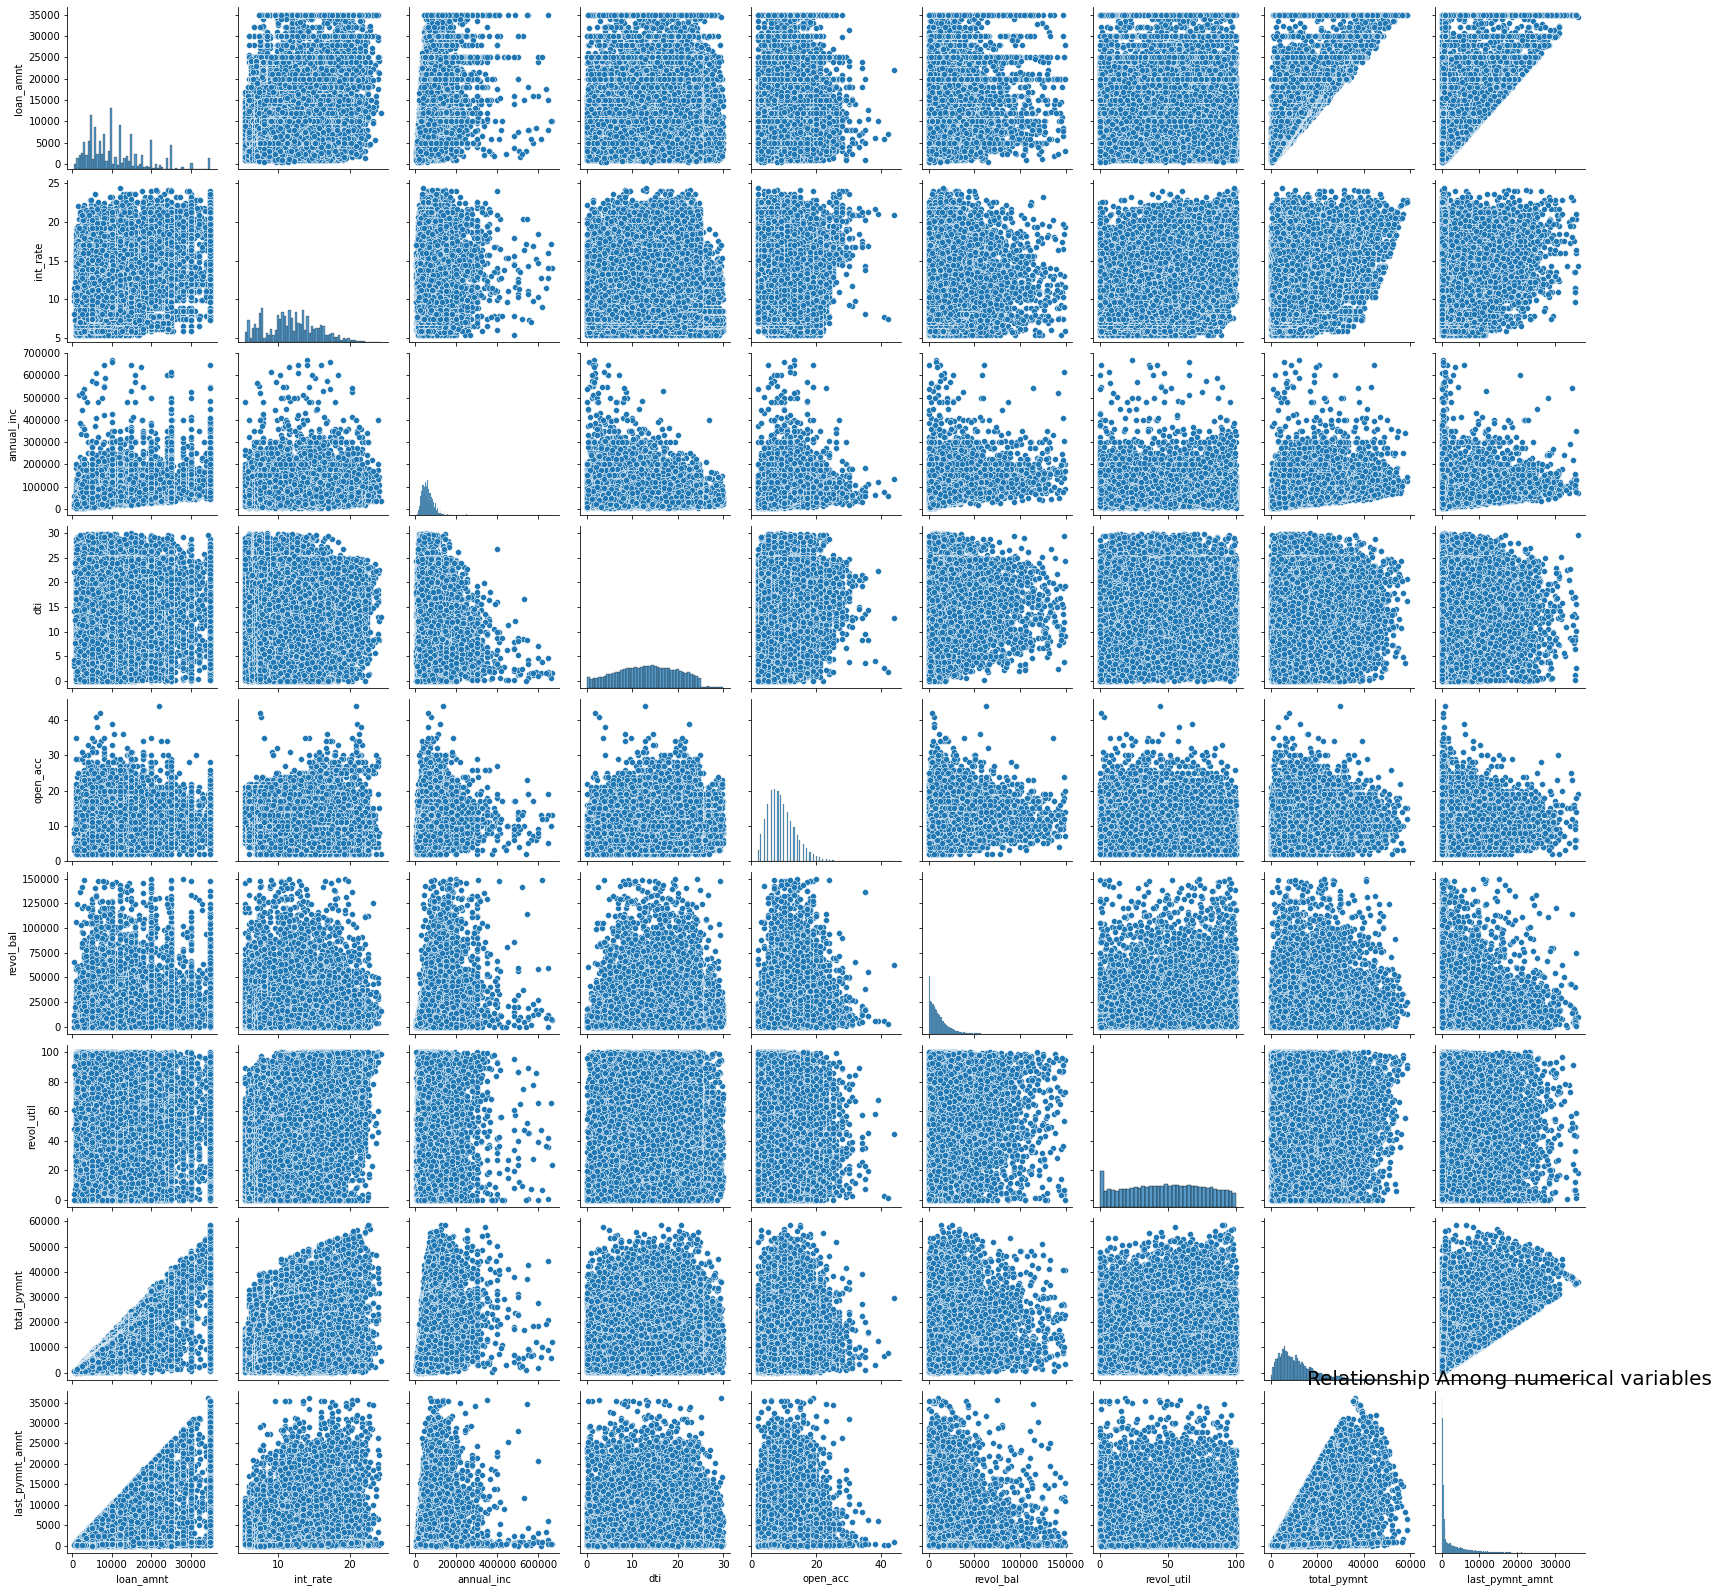

In [185]:
#Pairplot of various numerical variables.
sns.pairplot(loan_data[['loan_amnt', 'int_rate', 'annual_inc','dti', 'open_acc', 'revol_bal', 
                        'revol_util','total_pymnt', 'last_pymnt_amnt']])
plt.title("Relationship Among numerical variables", fontdict = {'fontsize' : 20})
plt.show()

**Observation**:

We have primarily used those variables to look at the distribtion which are not correlated and we could see how different does one variable react to others.


C:\Users\gautam.a.bhutani\Anaconda3\envs\tf\lib\site-packages\seaborn\axisgrid.py:1668: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  f.tight_layout()


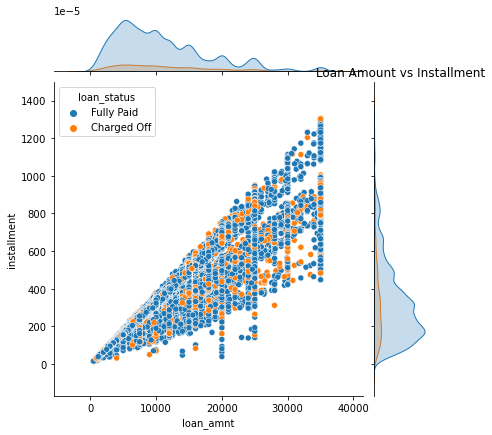

In [186]:
sns.jointplot('loan_amnt', 'installment', loan_data,hue='loan_status')
plt.title("Loan Amount vs Installment")
plt.show()

**Observation** :
    


C:\Users\gautam.a.bhutani\Anaconda3\envs\tf\lib\site-packages\seaborn\axisgrid.py:1668: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  f.tight_layout()


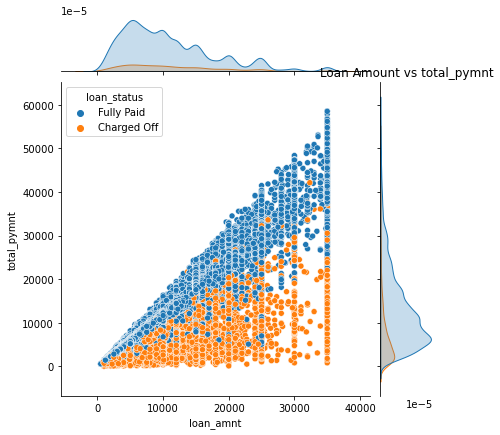

In [187]:
sns.jointplot('loan_amnt', 'total_pymnt', loan_data,hue='loan_status')
plt.title("Loan Amount vs total_pymnt")
plt.show()

C:\Users\gautam.a.bhutani\Anaconda3\envs\tf\lib\site-packages\seaborn\axisgrid.py:1668: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  f.tight_layout()


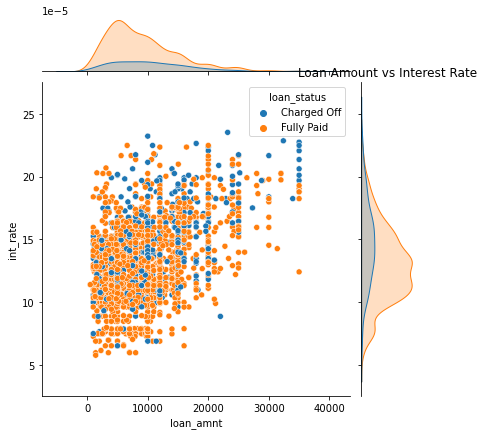

In [188]:
sns.jointplot('loan_amnt', 'int_rate', loan_data.loc[loan_data.pub_rec > 0],hue='loan_status')
plt.title("Loan Amount vs Interest Rate")
plt.show()

**Multivariate analysis helped us finding the correlated features and we can know about the relationship of other variables with each other.**



# Final Observations

## Deciding Factors for Lending Club

**Loan Amount**<br>
    - The club can investigate before issuing loan amount more than 12k to reduce the percentage of defaulted customers.<br><br>
**Interest Rate** and **Term**<br>
    - The club can reduce the high interest loans for 60 months tenure, they are prone to loan default.<br><br>
**Issue month**<br>
    - The club can control the number of loans issued in the last quarter of the year as the risk of charge off increases.<br><br>
**Grades**<br>
    - The company should investigate for customers before issuing loans to Low grade (D,E,F and G).<br><br>
**States**<br>
    - Lending Club should control their number of loan issues to customers who are from CA, FL and NY to make profits.<br><br>
**Purpose**<br>
    - Small business loans are Charged Off more followed by Debt consolidation. Lending club should investigate more before issuing the loans to them.<br><br>
**Home Ownership**<br>
    - Customers with mortgage home ownership are taking higher loans and defaulting the approved loans. Lending club should stop giving loans to this category when loan amount requested is more than 12k.<br><br>
**Pub rec**<br>
    - People with more number of public derogatory records are having more chance of filing bankruptcy. Lending club should make sure there are no public derogatory records for customer.<br>